In [1]:
import warnings

import torch

from omnisafe.common.experiment_grid import ExperimentGrid
import omnisafe

In [2]:
eg = ExperimentGrid(exp_name='BM_Safety_Unconstrained')

base_policy = ['TRPO', 'PPO']

safety_envs = [
    'SafetyPointGoal1-v0',
]
eg.add('env_id', safety_envs)

avaliable_gpus = list(range(torch.cuda.device_count()))
gpu_id = [0]

if gpu_id and not set(gpu_id).issubset(avaliable_gpus):
    warnings.warn('The GPU ID is not available, use CPU instead.', stacklevel=1)
    gpu_id = None

eg.add('algo', base_policy)
eg.add('logger_cfgs:use_wandb', [True])
eg.add('logger_cfgs:wandb_project', ['Benchmark_Safety'])
eg.add('train_cfgs:vector_env_nums', [4])
eg.add('train_cfgs:torch_threads', [8])
eg.add('algo_cfgs:steps_per_epoch', [20000])
eg.add('train_cfgs:total_steps', [20000 * 30])
eg.add('seed', [0])

In [3]:
"""Example of training a policy from exp-x config with OmniSafe."""
import os, sys
from omnisafe.typing import NamedTuple, Tuple


def train(
    exp_id: str, algo: str, env_id: str, custom_cfgs: NamedTuple
) -> Tuple[float, float, float]:
    """Train a policy from exp-x config with OmniSafe.

    Args:
        exp_id (str): Experiment ID.
        algo (str): Algorithm to train.
        env_id (str): The name of test environment.
        custom_cfgs (NamedTuple): Custom configurations.
        num_threads (int, optional): Number of threads. Defaults to 6.
    """
    terminal_log_name = 'terminal.log'
    error_log_name = 'error.log'
    if 'seed' in custom_cfgs:
        terminal_log_name = f'seed{custom_cfgs["seed"]}_{terminal_log_name}'
        error_log_name = f'seed{custom_cfgs["seed"]}_{error_log_name}'
    sys.stdout = sys.__stdout__
    sys.stderr = sys.__stderr__
    print(f'exp-x: {exp_id} is training...')
    if not os.path.exists(custom_cfgs['logger_cfgs']['log_dir']):
        os.makedirs(custom_cfgs['logger_cfgs']['log_dir'], exist_ok=True)
    # pylint: disable-next=consider-using-with
    sys.stdout = open(
        os.path.join(f'{custom_cfgs["logger_cfgs"]["log_dir"]}', terminal_log_name),
        'w',
        encoding='utf-8',
    )
    # pylint: disable-next=consider-using-with
    sys.stderr = open(
        os.path.join(f'{custom_cfgs["logger_cfgs"]["log_dir"]}', error_log_name),
        'w',
        encoding='utf-8',
    )
    agent = omnisafe.Agent(algo, env_id, custom_cfgs=custom_cfgs)
    reward, cost, ep_len = agent.learn()
    return reward, cost, ep_len

In [4]:
# total experiment num must can be divided by num_pool
# meanwhile, users should decide this value according to their machine
eg.run(train, gpu_id=gpu_id)

Save with config of experiment grid in grid_config.json

ExperimentGrid [BM_Safety_Unconstrained] runs over parameters:

 env_id                                  

[env] 

	"SafetyPointGoal1-v0"



 algo                                    

[alg] 

	"TRPO"
	"PPO"



 logger_cfgs:use_wandb                   

[log-use] 

	true



 logger_cfgs:wandb_project               

[log-wan] 

	"Benchmark_Safety"



 train_cfgs:vector_env_nums              

[tra-vec] 

	4



 train_cfgs:torch_threads                

[tra-tor] 

	8



 algo_cfgs:steps_per_epoch               

[alg-ste] 

	20000



 train_cfgs:total_steps                  

[tra-tot] 

	600000



 seed                                    

[see] 

	0

 Variants, counting seeds:               2
 Variants, not counting seeds:           2

value {'seed': 0, 'train_cfgs': {'total_steps': 600000, 'torch_threads': 8, 'vector_env_nums': 4}, 'algo_cfgs': {'steps_per_epoch': 20000}, 'logger_cfgs': {'wandb_project': 'Benchmark_Safety', 'use_wandb': True}, 'algo': 'TRPO', 'env_id': 'SafetyPointGoal1-v0'} key algo
value {'seed': 0, 'train_cfgs': {'total_steps': 600000, 'torch_threads': 8, 'vector_env_nums': 4}, 'algo_cfgs': {'steps_per_epoch': 20000}, 'logger_cfgs': {'wandb_project': 'Benchmark_Safety', 'use_wandb': True}, 'algo': 'PPO', 'env_id': 'SafetyPointGoal1-v0'} key algo


Preparing to run the following experiments...


BM_Safety_Unconstrained_algppo
BM_Safety_Unconstrained_algtrpo

current_config {'seed': 0, 'train_cfgs': {'total_steps': 600000, 'torch_threads': 8, 'vector_env_nums': 4}, 'algo_cfgs': {'steps_per_epoch': 20000}, 'logger_cfgs': {'wandb_project': 'Benchmark_Safety', 'use_wandb': True}, 'algo': 'TRPO', 'env_id': 'SafetyPointGoal1-v0'}


Logging data to 
./exp-x\BM_Safety_Unconstrained\SafetyPointGoal1-v0---dce575ce051f34bfb10e125b56a70286d41d91307da1cacad37e9d43f2725
ea0\TRPO-{SafetyPointGoal1-v0}\seed-000-2024-04-24-01-04-38\progress.csv

Save with config in config.json

project Benchmark_Safety name TRPO-{SafetyPointGoal1-v0}-seed-000-2024-04-24-01-04-38

INFO: Start training

c:\Users\saisa\.conda\envs\omnisafe-env\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.019440464675426483 Actual: 0.02065933868288994

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.6186364889144897    │
│ Metrics/EpCost                │ 63.150001525878906     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 0.0                    │
│ Train/Entropy                 │ 1.4143208265304565     │
│ Train/KL                      │ 0.0003661760129034519  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0004968643188477     │
│ Train/PolicyRatio/Min         │ 1.0004968643188477     │
│ Train/PolicyRatio/Max         │ 1.0004968643188477     │
│ Train/PolicyRatio/Std         │ 0.00035127991577610373 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9953987002372742     │
│ TotalEnvSteps                 │ 20000.0                │
│ Loss/Loss_pi                  │ -0.0137728750705719    │
│ Loss/Loss_pi/Delta            │ -0.0137728750705719    │
│ Value/Adv                     │ -1.678466787780053e-08 │
│ Loss/Loss_reward_critic       │ 0.005614597350358963   │
│ Loss/Loss_reward_critic/Delta │ 0.005614597350358963   │
│ Value/reward                  │ 0.008124573156237602   │
│ Time/Total                    │ 47.93138122558594      │
│ Time/Rollout                  │ 39.664546966552734     │
│ Time/Update                   │ 8.26583480834961       │
│ Time/Epoch                    │ 47.930381774902344     │
│ Time/FPS                      │ 417.2718505859375      │
│ Misc/Alpha                    │ 1.030076503753662      │
│ Misc/FinalStepNorm            │ 0.2801249027252197     │
│ Misc/gradient_norm            │ 0.08716051280498505    │
│ Misc/xHx                      │ 0.01884910836815834    │
│ Misc/H_inv_g                  │ 0.2719457149505615     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.023309990763664246 Actual: 0.023397549986839294

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 0.00013265013694763184 │
│ Metrics/EpCost                │ 87.8499984741211       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 1.0                    │
│ Train/Entropy                 │ 1.4050458669662476     │
│ Train/KL                      │ 0.0004128727305214852  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9997218251228333     │
│ Train/PolicyRatio/Min         │ 0.999721884727478      │
│ Train/PolicyRatio/Max         │ 0.999721884727478      │
│ Train/PolicyRatio/Std         │ 0.00019671338668558747 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9862244129180908     │
│ TotalEnvSteps                 │ 40000.0                │
│ Loss/Loss_pi                  │ -0.01559836883097887   │
│ Loss/Loss_pi/Delta            │ -0.001825493760406971  │
│ Value/Adv                     │ 3.051757735406113e-09  │
│ Loss/Loss_reward_critic       │ 0.0039384858682751656  │
│ Loss/Loss_reward_critic/Delta │ -0.0016761114820837975 │
│ Value/reward                  │ 0.007775569334626198   │
│ Time/Total                    │ 94.02232360839844      │
│ Time/Rollout                  │ 37.53558349609375      │
│ Time/Update                   │ 8.517351150512695      │
│ Time/Epoch                    │ 46.05293655395508      │
│ Time/FPS                      │ 434.2828369140625      │
│ Misc/Alpha                    │ 0.8587619066238403     │
│ Misc/FinalStepNorm            │ 0.24295927584171295    │
│ Misc/gradient_norm            │ 0.13131140172481537    │
│ Misc/xHx                      │ 0.02711966075003147    │
│ Misc/H_inv_g                  │ 0.2829180955886841     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01949791982769966 Actual: 0.02240443229675293

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.1483163833618164     │
│ Metrics/EpCost                │ 102.66000366210938     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 2.0                    │
│ Train/Entropy                 │ 1.4040008783340454     │
│ Train/KL                      │ 0.0004244667652528733  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0002599954605103     │
│ Train/PolicyRatio/Min         │ 1.0002601146697998     │
│ Train/PolicyRatio/Max         │ 1.0002601146697998     │
│ Train/PolicyRatio/Std         │ 0.00018392888887319714 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9851897358894348     │
│ TotalEnvSteps                 │ 60000.0                │
│ Loss/Loss_pi                  │ -0.014936293475329876  │
│ Loss/Loss_pi/Delta            │ 0.0006620753556489944  │
│ Value/Adv                     │ 7.629394005448376e-09  │
│ Loss/Loss_reward_critic       │ 0.007999910973012447   │
│ Loss/Loss_reward_critic/Delta │ 0.004061425104737282   │
│ Value/reward                  │ 0.03946874290704727    │
│ Time/Total                    │ 143.17886352539062     │
│ Time/Rollout                  │ 41.24666213989258      │
│ Time/Update                   │ 7.885337829589844      │
│ Time/Epoch                    │ 49.13199996948242      │
│ Time/FPS                      │ 407.0666809082031      │
│ Misc/Alpha                    │ 1.0270298719406128     │
│ Misc/FinalStepNorm            │ 0.24991938471794128    │
│ Misc/gradient_norm            │ 0.09790060669183731    │
│ Misc/xHx                      │ 0.01896110363304615    │
│ Misc/H_inv_g                  │ 0.24334189295768738    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.018781274557113647 Actual: 0.020036885514855385

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.654716730117798      │
│ Metrics/EpCost                │ 99.22000122070312      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 3.0                    │
│ Train/Entropy                 │ 1.3972028493881226     │
│ Train/KL                      │ 0.00044131383765488863 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9997665286064148     │
│ Train/PolicyRatio/Min         │ 0.9997665286064148     │
│ Train/PolicyRatio/Max         │ 0.9997665286064148     │
│ Train/PolicyRatio/Std         │ 0.00016510325076524168 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9785836338996887     │
│ TotalEnvSteps                 │ 80000.0                │
│ Loss/Loss_pi                  │ -0.013357922434806824  │
│ Loss/Loss_pi/Delta            │ 0.0015783710405230522  │
│ Value/Adv                     │ -3.051757735406113e-09 │
│ Loss/Loss_reward_critic       │ 0.009094097651541233   │
│ Loss/Loss_reward_critic/Delta │ 0.0010941866785287857  │
│ Value/reward                  │ 0.09276454150676727    │
│ Time/Total                    │ 193.5540313720703      │
│ Time/Rollout                  │ 42.00790023803711      │
│ Time/Update                   │ 8.339274406433105      │
│ Time/Epoch                    │ 50.34717559814453      │
│ Time/FPS                      │ 397.2417297363281      │
│ Misc/Alpha                    │ 1.0663714408874512     │
│ Misc/FinalStepNorm            │ 0.24759022891521454    │
│ Misc/gradient_norm            │ 0.09265939891338348    │
│ Misc/xHx                      │ 0.017587848007678986   │
│ Misc/H_inv_g                  │ 0.23218008875846863    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.017786122858524323 Actual: 0.018405066803097725

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 4.5273332595825195     │
│ Metrics/EpCost                │ 91.5999984741211       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 4.0                    │
│ Train/Entropy                 │ 1.3872489929199219     │
│ Train/KL                      │ 0.0004478661867324263  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0009711980819702     │
│ Train/PolicyRatio/Min         │ 1.0009711980819702     │
│ Train/PolicyRatio/Max         │ 1.0009711980819702     │
│ Train/PolicyRatio/Std         │ 0.0006867688498459756  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9689245223999023     │
│ TotalEnvSteps                 │ 100000.0               │
│ Loss/Loss_pi                  │ -0.012270045466721058  │
│ Loss/Loss_pi/Delta            │ 0.0010878769680857658  │
│ Value/Adv                     │ 1.1444091230217168e-09 │
│ Loss/Loss_reward_critic       │ 0.013760644011199474   │
│ Loss/Loss_reward_critic/Delta │ 0.004666546359658241   │
│ Value/reward                  │ 0.17291414737701416    │
│ Time/Total                    │ 247.01161193847656     │
│ Time/Rollout                  │ 45.5484619140625       │
│ Time/Update                   │ 7.872102737426758      │
│ Time/Epoch                    │ 53.420562744140625     │
│ Time/FPS                      │ 374.3876647949219      │
│ Misc/Alpha                    │ 1.1262215375900269     │
│ Misc/FinalStepNorm            │ 0.23798877000808716    │
│ Misc/gradient_norm            │ 0.10193535685539246    │
│ Misc/xHx                      │ 0.015768198296427727   │
│ Misc/H_inv_g                  │ 0.21131612360477448    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.02010798081755638 Actual: 0.02128170244395733

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 6.752406597137451      │
│ Metrics/EpCost                │ 80.91999816894531      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 5.0                    │
│ Train/Entropy                 │ 1.379452109336853      │
│ Train/KL                      │ 0.0004500800569076091  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0003280639648438     │
│ Train/PolicyRatio/Min         │ 1.0003280639648438     │
│ Train/PolicyRatio/Max         │ 1.0003280639648438     │
│ Train/PolicyRatio/Std         │ 0.0002319200721103698  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9617709517478943     │
│ TotalEnvSteps                 │ 120000.0               │
│ Loss/Loss_pi                  │ -0.01418787520378828   │
│ Loss/Loss_pi/Delta            │ -0.0019178297370672226 │
│ Value/Adv                     │ 7.171630755919978e-08  │
│ Loss/Loss_reward_critic       │ 0.012866786681115627   │
│ Loss/Loss_reward_critic/Delta │ -0.000893857330083847  │
│ Value/reward                  │ 0.2764071226119995     │
│ Time/Total                    │ 303.28936767578125     │
│ Time/Rollout                  │ 48.62028503417969      │
│ Time/Update                   │ 7.62546443939209       │
│ Time/Epoch                    │ 56.245750427246094     │
│ Time/FPS                      │ 355.5824279785156      │
│ Misc/Alpha                    │ 0.9957680702209473     │
│ Misc/FinalStepNorm            │ 0.22335615754127502    │
│ Misc/gradient_norm            │ 0.12472045421600342    │
│ Misc/xHx                      │ 0.02017034962773323    │
│ Misc/H_inv_g                  │ 0.2243054062128067     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.018815742805600166 Actual: 0.01927465945482254

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 9.684684753417969      │
│ Metrics/EpCost                │ 80.23999786376953      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 6.0                    │
│ Train/Entropy                 │ 1.363561987876892      │
│ Train/KL                      │ 0.0004447728570085019  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.000272274017334      │
│ Train/PolicyRatio/Min         │ 1.000272274017334      │
│ Train/PolicyRatio/Max         │ 1.000272274017334      │
│ Train/PolicyRatio/Std         │ 0.00019252680067438632 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9467865824699402     │
│ TotalEnvSteps                 │ 140000.0               │
│ Loss/Loss_pi                  │ -0.01284982729703188   │
│ Loss/Loss_pi/Delta            │ 0.001338047906756401   │
│ Value/Adv                     │ 5.340575981449547e-08  │
│ Loss/Loss_reward_critic       │ 0.013755334541201591   │
│ Loss/Loss_reward_critic/Delta │ 0.0008885478600859642  │
│ Value/reward                  │ 0.4285164177417755     │
│ Time/Total                    │ 358.9591369628906      │
│ Time/Rollout                  │ 47.900821685791016     │
│ Time/Update                   │ 7.734952926635742      │
│ Time/Epoch                    │ 55.63577651977539      │
│ Time/FPS                      │ 359.4809265136719      │
│ Misc/Alpha                    │ 1.064305067062378      │
│ Misc/FinalStepNorm            │ 0.23292818665504456    │
│ Misc/gradient_norm            │ 0.12057773023843765    │
│ Misc/xHx                      │ 0.01765620894730091    │
│ Misc/H_inv_g                  │ 0.21885472536087036    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.021374879404902458 Actual: 0.02156028151512146

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 11.972870826721191     │
│ Metrics/EpCost                │ 74.31999969482422      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 7.0                    │
│ Train/Entropy                 │ 1.336290955543518      │
│ Train/KL                      │ 0.000465935911051929   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9995129704475403     │
│ Train/PolicyRatio/Min         │ 0.9995130300521851     │
│ Train/PolicyRatio/Max         │ 0.9995130300521851     │
│ Train/PolicyRatio/Std         │ 0.00034439595765434206 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.9214891791343689     │
│ TotalEnvSteps                 │ 160000.0               │
│ Loss/Loss_pi                  │ -0.01437351107597351   │
│ Loss/Loss_pi/Delta            │ -0.0015236837789416313 │
│ Value/Adv                     │ -5.340575981449547e-09 │
│ Loss/Loss_reward_critic       │ 0.014757752418518066   │
│ Loss/Loss_reward_critic/Delta │ 0.001002417877316475   │
│ Value/reward                  │ 0.5321381092071533     │
│ Time/Total                    │ 410.3563232421875      │
│ Time/Rollout                  │ 44.21043395996094      │
│ Time/Update                   │ 7.1392598152160645     │
│ Time/Epoch                    │ 51.349693298339844     │
│ Time/FPS                      │ 389.48626708984375     │
│ Misc/Alpha                    │ 0.9366418123245239     │
│ Misc/FinalStepNorm            │ 0.2203027307987213     │
│ Misc/gradient_norm            │ 0.1436043232679367     │
│ Misc/xHx                      │ 0.02279726229608059    │
│ Misc/H_inv_g                  │ 0.23520487546920776    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.020714476704597473 Actual: 0.020773692056536674

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 14.597931861877441     │
│ Metrics/EpCost                │ 64.54000091552734      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 8.0                    │
│ Train/Entropy                 │ 1.308836817741394      │
│ Train/KL                      │ 0.0004736801201943308  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9999997019767761     │
│ Train/PolicyRatio/Min         │ 0.9999997019767761     │
│ Train/PolicyRatio/Max         │ 0.9999997019767761     │
│ Train/PolicyRatio/Std         │ 1.9768624781590916e-07 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.8968427777290344     │
│ TotalEnvSteps                 │ 180000.0               │
│ Loss/Loss_pi                  │ -0.013849075883626938  │
│ Loss/Loss_pi/Delta            │ 0.0005244351923465729  │
│ Value/Adv                     │ -5.035400363340159e-08 │
│ Loss/Loss_reward_critic       │ 0.01381485816091299    │
│ Loss/Loss_reward_critic/Delta │ -0.0009428942576050758 │
│ Value/reward                  │ 0.6813177466392517     │
│ Time/Total                    │ 466.35784912109375     │
│ Time/Rollout                  │ 48.42500686645508      │
│ Time/Update                   │ 7.54252815246582       │
│ Time/Epoch                    │ 55.967533111572266     │
│ Time/FPS                      │ 357.35003662109375     │
│ Misc/Alpha                    │ 0.9664730429649353     │
│ Misc/FinalStepNorm            │ 0.2134418934583664     │
│ Misc/gradient_norm            │ 0.1701372265815735     │
│ Misc/xHx                      │ 0.021411657333374023   │
│ Misc/H_inv_g                  │ 0.22084619104862213    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01837635040283203 Actual: 0.018205031752586365

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 16.551572799682617    │
│ Metrics/EpCost                │ 56.29999923706055     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 9.0                   │
│ Train/Entropy                 │ 1.2793099880218506    │
│ Train/KL                      │ 0.0004239808185957372 │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 0.9992416501045227    │
│ Train/PolicyRatio/Min         │ 0.9992417097091675    │
│ Train/PolicyRatio/Max         │ 0.9992417097091675    │
│ Train/PolicyRatio/Std         │ 0.0005362484371289611 │
│ Train/LR                      │ 0.0                   │
│ Train/PolicyStd               │ 0.8714873790740967    │
│ TotalEnvSteps                 │ 200000.0              │
│ Loss/Loss_pi                  │ -0.012136600911617279 │
│ Loss/Loss_pi/Delta            │ 0.0017124749720096588 │
│ Value/Adv                     │ -8.46862775460977e-08 │
│ Loss/Loss_reward_critic       │ 0.017060058191418648  │
│ Loss/Loss_reward_critic/Delta │ 0.003245200030505657  │
│ Value/reward                  │ 0.8125696778297424    │
│ Time/Total                    │ 521.3201904296875     │
│ Time/Rollout                  │ 47.60352325439453     │
│ Time/Update                   │ 7.325544357299805     │
│ Time/Epoch                    │ 54.92906951904297     │
│ Time/FPS                      │ 364.1059265136719     │
│ Misc/Alpha                    │ 1.0896756649017334    │
│ Misc/FinalStepNorm            │ 0.24252475798130035   │
│ Misc/gradient_norm            │ 0.13387100398540497   │
│ Misc/xHx                      │ 0.016843613237142563  │
│ Misc/H_inv_g                  │ 0.22256599366664886   │
│ Misc/AcceptanceStep           │ 1.0                   │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01823122799396515 Actual: 0.018183808773756027

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 18.125343322753906     │
│ Metrics/EpCost                │ 61.02000045776367      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 10.0                   │
│ Train/Entropy                 │ 1.2477985620498657     │
│ Train/KL                      │ 0.0004182633711025119  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9981480240821838     │
│ Train/PolicyRatio/Min         │ 0.9981480836868286     │
│ Train/PolicyRatio/Max         │ 0.9981480836868286     │
│ Train/PolicyRatio/Std         │ 0.0013095306931063533  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.8454329371452332     │
│ TotalEnvSteps                 │ 220000.0               │
│ Loss/Loss_pi                  │ -0.012122576124966145  │
│ Loss/Loss_pi/Delta            │ 1.4024786651134491e-05 │
│ Value/Adv                     │ 3.814697180359872e-08  │
│ Loss/Loss_reward_critic       │ 0.017499510198831558   │
│ Loss/Loss_reward_critic/Delta │ 0.00043945200741291046 │
│ Value/reward                  │ 0.9618374109268188     │
│ Time/Total                    │ 576.9144897460938      │
│ Time/Rollout                  │ 47.78362274169922      │
│ Time/Update                   │ 7.776671409606934      │
│ Time/Epoch                    │ 55.56029510498047      │
│ Time/FPS                      │ 359.96929931640625     │
│ Misc/Alpha                    │ 1.0983153581619263     │
│ Misc/FinalStepNorm            │ 0.249980166554451      │
│ Misc/gradient_norm            │ 0.12245307117700577    │
│ Misc/xHx                      │ 0.016579661518335342   │
│ Misc/H_inv_g                  │ 0.2276032716035843     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.017945466563105583 Actual: 0.017093762755393982

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 19.82425308227539      │
│ Metrics/EpCost                │ 60.86000061035156      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 11.0                   │
│ Train/Entropy                 │ 1.2230782508850098     │
│ Train/KL                      │ 0.00039879741962067783 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9998617172241211     │
│ Train/PolicyRatio/Min         │ 0.9998617172241211     │
│ Train/PolicyRatio/Max         │ 0.9998617172241211     │
│ Train/PolicyRatio/Std         │ 9.77806921582669e-05   │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.8266132473945618     │
│ TotalEnvSteps                 │ 240000.0               │
│ Loss/Loss_pi                  │ -0.011395972222089767  │
│ Loss/Loss_pi/Delta            │ 0.0007266039028763771  │
│ Value/Adv                     │ 1.2969969986897922e-07 │
│ Loss/Loss_reward_critic       │ 0.018022719770669937   │
│ Loss/Loss_reward_critic/Delta │ 0.0005232095718383789  │
│ Value/reward                  │ 1.0822484493255615     │
│ Time/Total                    │ 631.8873291015625      │
│ Time/Rollout                  │ 47.31844711303711      │
│ Time/Update                   │ 7.61612606048584       │
│ Time/Epoch                    │ 54.934574127197266     │
│ Time/FPS                      │ 364.0694580078125      │
│ Misc/Alpha                    │ 1.1156716346740723     │
│ Misc/FinalStepNorm            │ 0.2542608380317688     │
│ Misc/gradient_norm            │ 0.14218685030937195    │
│ Misc/xHx                      │ 0.01606781780719757    │
│ Misc/H_inv_g                  │ 0.22789934277534485    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.018161986023187637 Actual: 0.017661450430750847

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 20.794178009033203      │
│ Metrics/EpCost                │ 62.900001525878906      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 12.0                    │
│ Train/Entropy                 │ 1.2024283409118652      │
│ Train/KL                      │ 0.00039462896529585123  │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9983270764350891      │
│ Train/PolicyRatio/Min         │ 0.9983271360397339      │
│ Train/PolicyRatio/Max         │ 0.9983271360397339      │
│ Train/PolicyRatio/Std         │ 0.0011828935239464045   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.8125826716423035      │
│ TotalEnvSteps                 │ 260000.0                │
│ Loss/Loss_pi                  │ -0.011774239130318165   │
│ Loss/Loss_pi/Delta            │ -0.00037826690822839737 │
│ Value/Adv                     │ -6.256103546320446e-08  │
│ Loss/Loss_reward_critic       │ 0.01655510812997818     │
│ Loss/Loss_reward_critic/Delta │ -0.0014676116406917572  │
│ Value/reward                  │ 1.267297625541687       │
│ Time/Total                    │ 687.3392333984375       │
│ Time/Rollout                  │ 47.96099090576172       │
│ Time/Update                   │ 7.453945159912109       │
│ Time/Epoch                    │ 55.41493606567383       │
│ Time/FPS                      │ 360.91351318359375      │
│ Misc/Alpha                    │ 1.1022592782974243      │
│ Misc/FinalStepNorm            │ 0.2509816586971283      │
│ Misc/gradient_norm            │ 0.1163463220000267      │
│ Misc/xHx                      │ 0.01646122708916664     │
│ Misc/H_inv_g                  │ 0.227697491645813       │
│ Misc/AcceptanceStep           │ 1.0                     │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01640627160668373 Actual: 0.01605689339339733

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 21.83535385131836      │
│ Metrics/EpCost                │ 49.619998931884766     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 13.0                   │
│ Train/Entropy                 │ 1.1802936792373657     │
│ Train/KL                      │ 0.0003748146118596196  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9997348785400391     │
│ Train/PolicyRatio/Min         │ 0.9997348785400391     │
│ Train/PolicyRatio/Max         │ 0.9997348785400391     │
│ Train/PolicyRatio/Std         │ 0.00018746918067336082 │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.7965652346611023     │
│ TotalEnvSteps                 │ 280000.0               │
│ Loss/Loss_pi                  │ -0.010704658925533295  │
│ Loss/Loss_pi/Delta            │ 0.0010695802047848701  │
│ Value/Adv                     │ 6.561278809158466e-08  │
│ Loss/Loss_reward_critic       │ 0.01896442100405693    │
│ Loss/Loss_reward_critic/Delta │ 0.0024093128740787506  │
│ Value/reward                  │ 1.418673038482666      │
│ Time/Total                    │ 742.9591674804688      │
│ Time/Rollout                  │ 47.72931671142578      │
│ Time/Update                   │ 7.859635829925537      │
│ Time/Epoch                    │ 55.588951110839844     │
│ Time/FPS                      │ 359.7837219238281      │
│ Misc/Alpha                    │ 1.2198737859725952     │
│ Misc/FinalStepNorm            │ 0.264701247215271      │
│ Misc/gradient_norm            │ 0.14715056121349335    │
│ Misc/xHx                      │ 0.013440016657114029   │
│ Misc/H_inv_g                  │ 0.21699070930480957    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01836543343961239 Actual: 0.017627818509936333

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.945423126220703     │
│ Metrics/EpCost                │ 45.52000045776367      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 14.0                   │
│ Train/Entropy                 │ 1.147494912147522      │
│ Train/KL                      │ 0.00039064057637006044 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0007972717285156     │
│ Train/PolicyRatio/Min         │ 1.0007972717285156     │
│ Train/PolicyRatio/Max         │ 1.0007972717285156     │
│ Train/PolicyRatio/Std         │ 0.0005637562717311084  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.7729619145393372     │
│ TotalEnvSteps                 │ 300000.0               │
│ Loss/Loss_pi                  │ -0.011751927435398102  │
│ Loss/Loss_pi/Delta            │ -0.0010472685098648071 │
│ Value/Adv                     │ 4.8446654687950286e-08 │
│ Loss/Loss_reward_critic       │ 0.016535388305783272   │
│ Loss/Loss_reward_critic/Delta │ -0.0024290326982736588 │
│ Value/reward                  │ 1.5675337314605713     │
│ Time/Total                    │ 798.3926391601562      │
│ Time/Rollout                  │ 47.45501708984375      │
│ Time/Update                   │ 7.937933921813965      │
│ Time/Epoch                    │ 55.39396286010742      │
│ Time/FPS                      │ 361.0501708984375      │
│ Misc/Alpha                    │ 1.0893548727035522     │
│ Misc/FinalStepNorm            │ 0.2606164813041687     │
│ Misc/gradient_norm            │ 0.1475607454776764     │
│ Misc/xHx                      │ 0.016853533685207367   │
│ Misc/H_inv_g                  │ 0.23923929035663605    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01660945825278759 Actual: 0.016632914543151855

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.185829162597656     │
│ Metrics/EpCost                │ 49.81999969482422      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 15.0                   │
│ Train/Entropy                 │ 1.1184301376342773     │
│ Train/KL                      │ 0.0003639677888713777  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994128346443176     │
│ Train/PolicyRatio/Min         │ 0.9994128942489624     │
│ Train/PolicyRatio/Max         │ 0.9994128942489624     │
│ Train/PolicyRatio/Std         │ 0.0004151745233684778  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.7524309158325195     │
│ TotalEnvSteps                 │ 320000.0               │
│ Loss/Loss_pi                  │ -0.0110885389149189    │
│ Loss/Loss_pi/Delta            │ 0.0006633885204792023  │
│ Value/Adv                     │ -7.247924571629483e-08 │
│ Loss/Loss_reward_critic       │ 0.017039911821484566   │
│ Loss/Loss_reward_critic/Delta │ 0.0005045235157012939  │
│ Value/reward                  │ 1.6460374593734741     │
│ Time/Total                    │ 852.75048828125        │
│ Time/Rollout                  │ 46.66727828979492      │
│ Time/Update                   │ 7.652743339538574      │
│ Time/Epoch                    │ 54.32001876831055      │
│ Time/FPS                      │ 368.1883850097656      │
│ Misc/Alpha                    │ 1.2050621509552002     │
│ Misc/FinalStepNorm            │ 0.2764899730682373     │
│ Misc/gradient_norm            │ 0.11599580943584442    │
│ Misc/xHx                      │ 0.01377243734896183    │
│ Misc/H_inv_g                  │ 0.22944042086601257    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01744052954018116 Actual: 0.0168430358171463

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.267126083374023      │
│ Metrics/EpCost                │ 59.119998931884766      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 16.0                    │
│ Train/Entropy                 │ 1.1023722887039185      │
│ Train/KL                      │ 0.0003174229641444981   │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9979828000068665      │
│ Train/PolicyRatio/Min         │ 0.9979828596115112      │
│ Train/PolicyRatio/Max         │ 0.9979828596115112      │
│ Train/PolicyRatio/Std         │ 0.00142633356153965     │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.741827666759491       │
│ TotalEnvSteps                 │ 340000.0                │
│ Loss/Loss_pi                  │ -0.011228675954043865   │
│ Loss/Loss_pi/Delta            │ -0.00014013703912496567 │
│ Value/Adv                     │ -1.678466787780053e-08  │
│ Loss/Loss_reward_critic       │ 0.018498888239264488    │
│ Loss/Loss_reward_critic/Delta │ 0.0014589764177799225   │
│ Value/reward                  │ 1.773299217224121       │
│ Time/Total                    │ 908.6182861328125       │
│ Time/Rollout                  │ 48.37726974487305       │
│ Time/Update                   │ 7.457181930541992       │
│ Time/Epoch                    │ 55.834449768066406      │
│ Time/FPS                      │ 358.2017822265625       │
│ Misc/Alpha                    │ 1.1470941305160522      │
│ Misc/FinalStepNorm            │ 0.2974245250225067      │
│ Misc/gradient_norm            │ 0.10843703895807266     │
│ Misc/xHx                      │ 0.015199580229818821    │
│ Misc/H_inv_g                  │ 0.25928518176078796     │
│ Misc/AcceptanceStep           │ 1.0                     │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.017819594591856003 Actual: 0.017900696024298668

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 23.393701553344727     │
│ Metrics/EpCost                │ 60.7599983215332       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 17.0                   │
│ Train/Entropy                 │ 1.0890001058578491     │
│ Train/KL                      │ 0.00035535881761461496 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0001336336135864     │
│ Train/PolicyRatio/Min         │ 1.000133752822876      │
│ Train/PolicyRatio/Max         │ 1.000133752822876      │
│ Train/PolicyRatio/Std         │ 9.452133963350207e-05  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.7337899208068848     │
│ TotalEnvSteps                 │ 360000.0               │
│ Loss/Loss_pi                  │ -0.011933781206607819  │
│ Loss/Loss_pi/Delta            │ -0.0007051052525639534 │
│ Value/Adv                     │ -1.831054596834747e-08 │
│ Loss/Loss_reward_critic       │ 0.019523100927472115   │
│ Loss/Loss_reward_critic/Delta │ 0.0010242126882076263  │
│ Value/reward                  │ 1.8418484926223755     │
│ Time/Total                    │ 963.2374267578125      │
│ Time/Rollout                  │ 46.380001068115234     │
│ Time/Update                   │ 8.202423095703125      │
│ Time/Epoch                    │ 54.58242416381836      │
│ Time/FPS                      │ 366.4183044433594      │
│ Misc/Alpha                    │ 1.1233500242233276     │
│ Misc/FinalStepNorm            │ 0.27793702483177185    │
│ Misc/gradient_norm            │ 0.1314394176006317     │
│ Misc/xHx                      │ 0.01584891602396965    │
│ Misc/H_inv_g                  │ 0.24741800129413605    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01439882256090641 Actual: 0.014222352765500546

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.387401580810547     │
│ Metrics/EpCost                │ 54.15999984741211      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 18.0                   │
│ Train/Entropy                 │ 1.0736002922058105     │
│ Train/KL                      │ 0.0002838793152477592  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9995258450508118     │
│ Train/PolicyRatio/Min         │ 0.9995259046554565     │
│ Train/PolicyRatio/Max         │ 0.9995259046554565     │
│ Train/PolicyRatio/Std         │ 0.0003352360217832029  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.7235763669013977     │
│ TotalEnvSteps                 │ 380000.0               │
│ Loss/Loss_pi                  │ -0.00948150921612978   │
│ Loss/Loss_pi/Delta            │ 0.002452271990478039   │
│ Value/Adv                     │ -6.1035152043587e-08   │
│ Loss/Loss_reward_critic       │ 0.01797632686793804    │
│ Loss/Loss_reward_critic/Delta │ -0.0015467740595340729 │
│ Value/reward                  │ 1.9690316915512085     │
│ Time/Total                    │ 1017.69287109375       │
│ Time/Rollout                  │ 46.923133850097656     │
│ Time/Update                   │ 7.500309944152832      │
│ Time/Epoch                    │ 54.42344665527344      │
│ Time/FPS                      │ 367.4886779785156      │
│ Misc/Alpha                    │ 1.3914679288864136     │
│ Misc/FinalStepNorm            │ 0.3133559823036194     │
│ Misc/gradient_norm            │ 0.10154832154512405    │
│ Misc/xHx                      │ 0.010329591110348701   │
│ Misc/H_inv_g                  │ 0.22519811987876892    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.014836530201137066 Actual: 0.014884845353662968

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.887269973754883     │
│ Metrics/EpCost                │ 51.15999984741211      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 19.0                   │
│ Train/Entropy                 │ 1.0676010847091675     │
│ Train/KL                      │ 0.00029313427512533963 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0005931854248047     │
│ Train/PolicyRatio/Min         │ 1.0005931854248047     │
│ Train/PolicyRatio/Max         │ 1.0005931854248047     │
│ Train/PolicyRatio/Std         │ 0.0004194454231765121  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.7194564342498779     │
│ TotalEnvSteps                 │ 400000.0               │
│ Loss/Loss_pi                  │ -0.009923231787979603  │
│ Loss/Loss_pi/Delta            │ -0.000441722571849823  │
│ Value/Adv                     │ -7.629394338515283e-10 │
│ Loss/Loss_reward_critic       │ 0.017282025888562202   │
│ Loss/Loss_reward_critic/Delta │ -0.0006943009793758392 │
│ Value/reward                  │ 2.078537940979004      │
│ Time/Total                    │ 1072.5250244140625     │
│ Time/Rollout                  │ 46.86293029785156      │
│ Time/Update                   │ 7.9341630935668945     │
│ Time/Epoch                    │ 54.797096252441406     │
│ Time/FPS                      │ 364.98284912109375     │
│ Misc/Alpha                    │ 1.3501458168029785     │
│ Misc/FinalStepNorm            │ 0.3049278259277344     │
│ Misc/gradient_norm            │ 0.1054813489317894     │
│ Misc/xHx                      │ 0.01097155548632145    │
│ Misc/H_inv_g                  │ 0.22584807872772217    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01801757887005806 Actual: 0.018476316705346107

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 24.9381103515625       │
│ Metrics/EpCost                │ 46.84000015258789      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 20.0                   │
│ Train/Entropy                 │ 1.0598326921463013     │
│ Train/KL                      │ 0.00035724262124858797 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9984790682792664     │
│ Train/PolicyRatio/Min         │ 0.9984790682792664     │
│ Train/PolicyRatio/Max         │ 0.9984790682792664     │
│ Train/PolicyRatio/Std         │ 0.0010755032999441028  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.715155303478241      │
│ TotalEnvSteps                 │ 420000.0               │
│ Loss/Loss_pi                  │ -0.012317542918026447  │
│ Loss/Loss_pi/Delta            │ -0.0023943111300468445 │
│ Value/Adv                     │ -3.051757735406113e-09 │
│ Loss/Loss_reward_critic       │ 0.015581764280796051   │
│ Loss/Loss_reward_critic/Delta │ -0.0017002616077661514 │
│ Value/reward                  │ 2.106006145477295      │
│ Time/Total                    │ 1127.4091796875        │
│ Time/Rollout                  │ 47.2347526550293       │
│ Time/Update                   │ 7.61649227142334       │
│ Time/Epoch                    │ 54.85124206542969      │
│ Time/FPS                      │ 364.6225280761719      │
│ Misc/Alpha                    │ 1.1109002828598022     │
│ Misc/FinalStepNorm            │ 0.27600687742233276    │
│ Misc/gradient_norm            │ 0.126103013753891      │
│ Misc/xHx                      │ 0.01620613969862461    │
│ Misc/H_inv_g                  │ 0.24845333397388458    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01690324768424034 Actual: 0.016795532777905464

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.050153732299805     │
│ Metrics/EpCost                │ 60.459999084472656     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 21.0                   │
│ Train/Entropy                 │ 1.0438770055770874     │
│ Train/KL                      │ 0.000353996641933918   │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.999065101146698      │
│ Train/PolicyRatio/Min         │ 0.999065101146698      │
│ Train/PolicyRatio/Max         │ 0.999065101146698      │
│ Train/PolicyRatio/Std         │ 0.0006611154531128705  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.7052122950553894     │
│ TotalEnvSteps                 │ 440000.0               │
│ Loss/Loss_pi                  │ -0.0111970454454422    │
│ Loss/Loss_pi/Delta            │ 0.0011204974725842476  │
│ Value/Adv                     │ 2.4414061883248905e-08 │
│ Loss/Loss_reward_critic       │ 0.017688997089862823   │
│ Loss/Loss_reward_critic/Delta │ 0.0021072328090667725  │
│ Value/reward                  │ 2.201514959335327      │
│ Time/Total                    │ 1181.7996826171875     │
│ Time/Rollout                  │ 46.268402099609375     │
│ Time/Update                   │ 8.089092254638672      │
│ Time/Epoch                    │ 54.35749435424805      │
│ Time/FPS                      │ 367.9345397949219      │
│ Misc/Alpha                    │ 1.1833951473236084     │
│ Misc/FinalStepNorm            │ 0.27716049551963806    │
│ Misc/gradient_norm            │ 0.1619863212108612     │
│ Misc/xHx                      │ 0.0142813790589571     │
│ Misc/H_inv_g                  │ 0.2342078983783722     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.017986081540584564 Actual: 0.017936311662197113

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.05392074584961      │
│ Metrics/EpCost                │ 71.80000305175781      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 22.0                   │
│ Train/Entropy                 │ 1.0315746068954468     │
│ Train/KL                      │ 0.0003310760948807001  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9991707801818848     │
│ Train/PolicyRatio/Min         │ 0.9991707801818848     │
│ Train/PolicyRatio/Max         │ 0.9991707801818848     │
│ Train/PolicyRatio/Std         │ 0.0005863750702701509  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.6975669264793396     │
│ TotalEnvSteps                 │ 460000.0               │
│ Loss/Loss_pi                  │ -0.01195755135267973   │
│ Loss/Loss_pi/Delta            │ -0.0007605059072375298 │
│ Value/Adv                     │ 9.155272984173735e-09  │
│ Loss/Loss_reward_critic       │ 0.015934765338897705   │
│ Loss/Loss_reward_critic/Delta │ -0.0017542317509651184 │
│ Value/reward                  │ 2.238863229751587      │
│ Time/Total                    │ 1236.734375            │
│ Time/Rollout                  │ 47.44161605834961      │
│ Time/Update                   │ 7.4192047119140625     │
│ Time/Epoch                    │ 54.86082077026367      │
│ Time/FPS                      │ 364.55889892578125     │
│ Misc/Alpha                    │ 1.112520694732666      │
│ Misc/FinalStepNorm            │ 0.2866482436656952     │
│ Misc/gradient_norm            │ 0.12575480341911316    │
│ Misc/xHx                      │ 0.01615896448493004    │
│ Misc/H_inv_g                  │ 0.2576565444469452     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01709762029349804 Actual: 0.01764087565243244

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.727672576904297     │
│ Metrics/EpCost                │ 68.81999969482422      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 23.0                   │
│ Train/Entropy                 │ 1.0210238695144653     │
│ Train/KL                      │ 0.0003311642212793231  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.001307487487793      │
│ Train/PolicyRatio/Min         │ 1.001307487487793      │
│ Train/PolicyRatio/Max         │ 1.001307487487793      │
│ Train/PolicyRatio/Std         │ 0.0009244771208614111  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.6917181611061096     │
│ TotalEnvSteps                 │ 480000.0               │
│ Loss/Loss_pi                  │ -0.011760552413761616  │
│ Loss/Loss_pi/Delta            │ 0.0001969989389181137  │
│ Value/Adv                     │ -3.204345588869728e-08 │
│ Loss/Loss_reward_critic       │ 0.016189241781830788   │
│ Loss/Loss_reward_critic/Delta │ 0.0002544764429330826  │
│ Value/reward                  │ 2.306717872619629      │
│ Time/Total                    │ 1292.845458984375      │
│ Time/Rollout                  │ 47.59519577026367      │
│ Time/Update                   │ 8.483870506286621      │
│ Time/Epoch                    │ 56.079063415527344     │
│ Time/FPS                      │ 356.6393127441406      │
│ Misc/Alpha                    │ 1.17046058177948       │
│ Misc/FinalStepNorm            │ 0.28922900557518005    │
│ Misc/gradient_norm            │ 0.1265861839056015     │
│ Misc/xHx                      │ 0.014598764479160309   │
│ Misc/H_inv_g                  │ 0.24710701406002045    │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.018110254779458046 Actual: 0.01828392781317234

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.89861488342285      │
│ Metrics/EpCost                │ 64.77999877929688      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 24.0                   │
│ Train/Entropy                 │ 1.001932978630066      │
│ Train/KL                      │ 0.0003304796409793198  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 1.0007365942001343     │
│ Train/PolicyRatio/Min         │ 1.0007365942001343     │
│ Train/PolicyRatio/Max         │ 1.0007365942001343     │
│ Train/PolicyRatio/Std         │ 0.0005208226502873003  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.680394172668457      │
│ TotalEnvSteps                 │ 500000.0               │
│ Loss/Loss_pi                  │ -0.012189309112727642  │
│ Loss/Loss_pi/Delta            │ -0.0004287566989660263 │
│ Value/Adv                     │ 1.831054596834747e-08  │
│ Loss/Loss_reward_critic       │ 0.017958100885152817   │
│ Loss/Loss_reward_critic/Delta │ 0.0017688591033220291  │
│ Value/reward                  │ 2.3557329177856445     │
│ Time/Total                    │ 1348.5301513671875     │
│ Time/Rollout                  │ 47.986568450927734     │
│ Time/Update                   │ 7.661191940307617      │
│ Time/Epoch                    │ 55.64775848388672      │
│ Time/FPS                      │ 359.40350341796875     │
│ Misc/Alpha                    │ 1.1045523881912231     │
│ Misc/FinalStepNorm            │ 0.29475706815719604    │
│ Misc/gradient_norm            │ 0.11424818634986877    │
│ Misc/xHx                      │ 0.01639294996857643    │
│ Misc/H_inv_g                  │ 0.2668565809726715     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.017564214766025543 Actual: 0.016255974769592285

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.745532989501953     │
│ Metrics/EpCost                │ 51.18000030517578      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 25.0                   │
│ Train/Entropy                 │ 0.9877951741218567     │
│ Train/KL                      │ 0.00030659843469038606 │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9984545707702637     │
│ Train/PolicyRatio/Min         │ 0.9984545707702637     │
│ Train/PolicyRatio/Max         │ 0.9984545707702637     │
│ Train/PolicyRatio/Std         │ 0.001092811580747366   │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.672208845615387      │
│ TotalEnvSteps                 │ 520000.0               │
│ Loss/Loss_pi                  │ -0.010837328620254993  │
│ Loss/Loss_pi/Delta            │ 0.0013519804924726486  │
│ Value/Adv                     │ 1.2969969986897922e-08 │
│ Loss/Loss_reward_critic       │ 0.015164346434175968   │
│ Loss/Loss_reward_critic/Delta │ -0.0027937544509768486 │
│ Value/reward                  │ 2.397714376449585      │
│ Time/Total                    │ 1403.5723876953125     │
│ Time/Rollout                  │ 47.454654693603516     │
│ Time/Update                   │ 7.553540229797363      │
│ Time/Epoch                    │ 55.00819396972656      │
│ Time/FPS                      │ 363.58221435546875     │
│ Misc/Alpha                    │ 1.1392072439193726     │
│ Misc/FinalStepNorm            │ 0.2946670949459076     │
│ Misc/gradient_norm            │ 0.1278344690799713     │
│ Misc/xHx                      │ 0.015410766936838627   │
│ Misc/H_inv_g                  │ 0.2586597800254822     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.01721661165356636 Actual: 0.016887091100215912

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.680091857910156      │
│ Metrics/EpCost                │ 46.459999084472656      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 26.0                    │
│ Train/Entropy                 │ 0.9791946411132812      │
│ Train/KL                      │ 0.0002832412428688258   │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 0.9992181658744812      │
│ Train/PolicyRatio/Min         │ 0.9992181658744812      │
│ Train/PolicyRatio/Max         │ 0.9992181658744812      │
│ Train/PolicyRatio/Std         │ 0.0005528542678803205   │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.6679266095161438      │
│ TotalEnvSteps                 │ 540000.0                │
│ Loss/Loss_pi                  │ -0.011258079670369625   │
│ Loss/Loss_pi/Delta            │ -0.00042075105011463165 │
│ Value/Adv                     │ 2.1362303925798187e-08  │
│ Loss/Loss_reward_critic       │ 0.015529644675552845    │
│ Loss/Loss_reward_critic/Delta │ 0.00036529824137687683  │
│ Value/reward                  │ 2.4320473670959473      │
│ Time/Total                    │ 1454.6337890625         │
│ Time/Rollout                  │ 42.8642692565918        │
│ Time/Update                   │ 8.161158561706543       │
│ Time/Epoch                    │ 51.025428771972656      │
│ Time/FPS                      │ 391.9614562988281       │
│ Misc/Alpha                    │ 1.1627156734466553      │
│ Misc/FinalStepNorm            │ 0.317464679479599       │
│ Misc/gradient_norm            │ 0.13393063843250275     │
│ Misc/xHx                      │ 0.014793898910284042    │
│ Misc/H_inv_g                  │ 0.27303722500801086     │
│ Misc/AcceptanceStep           │ 1.0                     │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.0165399182587862 Actual: 0.016682976856827736

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.98528289794922     │
│ Metrics/EpCost                │ 41.459999084472656    │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 27.0                  │
│ Train/Entropy                 │ 0.9713060855865479    │
│ Train/KL                      │ 0.0002884285931941122 │
│ Train/StopIter                │ 10.0                  │
│ Train/PolicyRatio/Mean        │ 0.9995730519294739    │
│ Train/PolicyRatio/Min         │ 0.9995731115341187    │
│ Train/PolicyRatio/Max         │ 0.9995731115341187    │
│ Train/PolicyRatio/Std         │ 0.0003019119321834296 │
│ Train/LR                      │ 0.0                   │
│ Train/PolicyStd               │ 0.6637507677078247    │
│ TotalEnvSteps                 │ 560000.0              │
│ Loss/Loss_pi                  │ -0.01112198457121849  │
│ Loss/Loss_pi/Delta            │ 0.0001360950991511345 │
│ Value/Adv                     │ 0.0                   │
│ Loss/Loss_reward_critic       │ 0.01734912395477295   │
│ Loss/Loss_reward_critic/Delta │ 0.0018194792792201042 │
│ Value/reward                  │ 2.461000442504883     │
│ Time/Total                    │ 1505.303466796875     │
│ Time/Rollout                  │ 42.56733703613281     │
│ Time/Update                   │ 8.063362121582031     │
│ Time/Epoch                    │ 50.630699157714844    │
│ Time/FPS                      │ 395.01727294921875    │
│ Misc/Alpha                    │ 1.210331916809082     │
│ Misc/FinalStepNorm            │ 0.30986711382865906   │
│ Misc/gradient_norm            │ 0.09588403254747391   │
│ Misc/xHx                      │ 0.013652767986059189  │
│ Misc/H_inv_g                  │ 0.2560183107852936    │
│ Misc/AcceptanceStep           │ 1.0                   │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.016927029937505722 Actual: 0.01649693213403225

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 25.978504180908203      │
│ Metrics/EpCost                │ 49.560001373291016      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 28.0                    │
│ Train/Entropy                 │ 0.9600942730903625      │
│ Train/KL                      │ 0.000289455201709643    │
│ Train/StopIter                │ 10.0                    │
│ Train/PolicyRatio/Mean        │ 1.0000463724136353      │
│ Train/PolicyRatio/Min         │ 1.0000464916229248      │
│ Train/PolicyRatio/Max         │ 1.0000464916229248      │
│ Train/PolicyRatio/Std         │ 3.2762174669187516e-05  │
│ Train/LR                      │ 0.0                     │
│ Train/PolicyStd               │ 0.6581891179084778      │
│ TotalEnvSteps                 │ 580000.0                │
│ Loss/Loss_pi                  │ -0.010997936129570007   │
│ Loss/Loss_pi/Delta            │ 0.00012404844164848328  │
│ Value/Adv                     │ -1.0681151962899094e-08 │
│ Loss/Loss_reward_critic       │ 0.014386549592018127    │
│ Loss/Loss_reward_critic/Delta │ -0.0029625743627548218  │
│ Value/reward                  │ 2.4763989448547363      │
│ Time/Total                    │ 1556.6265869140625      │
│ Time/Rollout                  │ 42.970367431640625      │
│ Time/Update                   │ 8.324103355407715       │
│ Time/Epoch                    │ 51.294471740722656      │
│ Time/FPS                      │ 389.90557861328125      │
│ Misc/Alpha                    │ 1.1823769807815552      │
│ Misc/FinalStepNorm            │ 0.3165654242038727      │
│ Misc/gradient_norm            │ 0.09628187865018845     │
│ Misc/xHx                      │ 0.01430598460137844     │
│ Misc/H_inv_g                  │ 0.26773643493652344     │
│ Misc/AcceptanceStep           │ 1.0                     │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Expected Improvement: 0.017968203872442245 Actual: 0.01803917996585369

Accept step at i=1

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 26.23552703857422      │
│ Metrics/EpCost                │ 54.34000015258789      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 29.0                   │
│ Train/Entropy                 │ 0.9603052735328674     │
│ Train/KL                      │ 0.0002739510382525623  │
│ Train/StopIter                │ 10.0                   │
│ Train/PolicyRatio/Mean        │ 0.9998107552528381     │
│ Train/PolicyRatio/Min         │ 0.9998108148574829     │
│ Train/PolicyRatio/Max         │ 0.9998108148574829     │
│ Train/PolicyRatio/Std         │ 0.0001338021975243464  │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.6589363813400269     │
│ TotalEnvSteps                 │ 600000.0               │
│ Loss/Loss_pi                  │ -0.012026116251945496  │
│ Loss/Loss_pi/Delta            │ -0.0010281801223754883 │
│ Value/Adv                     │ -7.629394005448376e-09 │
│ Loss/Loss_reward_critic       │ 0.016523452475667      │
│ Loss/Loss_reward_critic/Delta │ 0.0021369028836488724  │
│ Value/reward                  │ 2.5529022216796875     │
│ Time/Total                    │ 1607.9383544921875     │
│ Time/Rollout                  │ 43.3415641784668       │
│ Time/Update                   │ 7.936118125915527      │
│ Time/Epoch                    │ 51.27768325805664      │
│ Time/FPS                      │ 390.0332336425781      │
│ Misc/Alpha                    │ 1.113976001739502      │
│ Misc/FinalStepNorm            │ 0.3136454224586487     │
│ Misc/gradient_norm            │ 0.11043958365917206    │
│ Misc/xHx                      │ 0.01611677184700966    │
│ Misc/H_inv_g                  │ 0.2815549373626709     │
│ Misc/AcceptanceStep           │ 1.0                    │
└───────────────────────────────┴────────────────────────┘

Logging data to 
./exp-x\BM_Safety_Unconstrained\SafetyPointGoal1-v0---999237c8a579096ba86ab3adcf0f9920f8c8e50b5e4a8f222ceb30613ecc9
2ca\PPO-{SafetyPointGoal1-v0}\seed-000-2024-04-24-01-31-35\progress.csv

Save with config in config.json

project Benchmark_Safety name PPO-{SafetyPointGoal1-v0}-seed-000-2024-04-24-01-31-35

Loss/Loss_pi,▃▁▂▄▅▃▄▂▃▅▅▆▅▇▅▆▆▅█▇▅▆▅▅▅▆▆▆▆▅
Loss/Loss_pi/Delta,▁▆▇█▇▆█▆▇█▇▇▇▇▆▇▇▇█▇▆▇▇▇▇█▇▇▇▆
Loss/Loss_reward_critic,▂▁▃▃▅▅▅▆▅▇▇▇▇█▇▇██▇▇▆▇▆▇▇▆▆▇▆▇
Loss/Loss_reward_critic/Delta,█▂▇▄▇▃▄▄▃▆▄▄▂▅▁▄▅▄▂▃▂▅▂▄▅▁▄▅▁▅
Metrics/EpCost,▃▆██▇▆▅▅▄▃▃▃▃▂▁▂▃▃▂▂▂▃▄▄▄▂▂▁▂▂
Metrics/EpLen,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Metrics/EpRet,▁▁▁▂▂▃▄▄▅▅▆▆▇▇▇▇▇▇████████████
Misc/AcceptanceStep,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Misc/Alpha,▃▁▃▄▅▃▄▂▂▄▄▄▄▆▄▆▅▄█▇▄▅▄▅▄▅▅▆▅▄
Misc/FinalStepNorm,▅▃▃▃▃▂▂▁▁▃▃▄▄▄▄▅▇▅█▇▅▅▆▆▆▆█▇██
Misc/H_inv_g,▇█▄▃▁▂▂▃▂▂▃▃▃▂▄▃▆▅▂▂▅▃▆▄▆▆▇▅▇█


INFO: Start training

c:\Users\saisa\.conda\envs\omnisafe-env\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.6186364889144897   │
│ Metrics/EpCost                │ 63.150001525878906    │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 0.0                   │
│ Train/Entropy                 │ 1.4062575101852417    │
│ Train/KL                      │ 0.012556595727801323  │
│ Train/StopIter                │ 40.0                  │
│ Train/PolicyRatio/Mean        │ 1.0009379386901855    │
│ Train/PolicyRatio/Min         │ 1.0009379386901855    │
│ Train/PolicyRatio/Max         │ 1.0009379386901855    │
│ Train/PolicyRatio/Std         │ 0.01757177896797657   │
│ Train/LR                      │ 0.0002899999963119626 │
│ Train/PolicyStd               │ 0.9874053597450256    │
│ TotalEnvSteps                 │ 20000.0               │
│ Loss/Loss_pi                  │ -0.013987178914248943 │
│ Loss/Loss_pi/Delta            │ -0.013987178914248943 │
│ Value/Adv                     │ -0.04316987097263336  │
│ Loss/Loss_reward_critic       │ 0.004342734348028898  │
│ Loss/Loss_reward_critic/Delta │ 0.004342734348028898  │
│ Value/reward                  │ 0.008124573156237602  │
│ Time/Total                    │ 161.50987243652344    │
│ Time/Rollout                  │ 38.18334197998047     │
│ Time/Update                   │ 123.32551574707031    │
│ Time/Epoch                    │ 161.5088653564453     │
│ Time/FPS                      │ 123.83221435546875    │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 35 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ -0.29656919836997986   │
│ Metrics/EpCost                │ 62.849998474121094     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 1.0                    │
│ Train/Entropy                 │ 1.3864049911499023     │
│ Train/KL                      │ 0.020895039662718773   │
│ Train/StopIter                │ 35.0                   │
│ Train/PolicyRatio/Mean        │ 0.9978679418563843     │
│ Train/PolicyRatio/Min         │ 0.9978679418563843     │
│ Train/PolicyRatio/Max         │ 0.9978679418563843     │
│ Train/PolicyRatio/Std         │ 0.02135325036942959    │
│ Train/LR                      │ 0.0002800000074785203  │
│ Train/PolicyStd               │ 0.96799635887146       │
│ TotalEnvSteps                 │ 40000.0                │
│ Loss/Loss_pi                  │ -0.020730717107653618  │
│ Loss/Loss_pi/Delta            │ -0.0067435381934046745 │
│ Value/Adv                     │ 0.05718689411878586    │
│ Loss/Loss_reward_critic       │ 0.0030590395908802748  │
│ Loss/Loss_reward_critic/Delta │ -0.0012836947571486235 │
│ Value/reward                  │ 0.001568953855894506   │
│ Time/Total                    │ 313.6102600097656      │
│ Time/Rollout                  │ 43.18916320800781      │
│ Time/Update                   │ 108.87922668457031     │
│ Time/Epoch                    │ 152.06838989257812     │
│ Time/FPS                      │ 131.519775390625       │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 14 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 0.37877216935157776   │
│ Metrics/EpCost                │ 79.23999786376953     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 2.0                   │
│ Train/Entropy                 │ 1.364654302597046     │
│ Train/KL                      │ 0.02042592130601406   │
│ Train/StopIter                │ 14.0                  │
│ Train/PolicyRatio/Mean        │ 0.9984123706817627    │
│ Train/PolicyRatio/Min         │ 0.9984123110771179    │
│ Train/PolicyRatio/Max         │ 0.9984123110771179    │
│ Train/PolicyRatio/Std         │ 0.020553676411509514  │
│ Train/LR                      │ 0.0002699999895412475 │
│ Train/PolicyStd               │ 0.9472034573554993    │
│ TotalEnvSteps                 │ 60000.0               │
│ Loss/Loss_pi                  │ -0.013238458894193172 │
│ Loss/Loss_pi/Delta            │ 0.007492258213460445  │
│ Value/Adv                     │ 0.17558756470680237   │
│ Loss/Loss_reward_critic       │ 0.006494530942291021  │
│ Loss/Loss_reward_critic/Delta │ 0.0034354913514107466 │
│ Value/reward                  │ 0.023884659633040428  │
│ Time/Total                    │ 399.6939392089844     │
│ Time/Rollout                  │ 42.58050537109375     │
│ Time/Update                   │ 43.469173431396484    │
│ Time/Epoch                    │ 86.0496826171875      │
│ Time/FPS                      │ 232.4238739013672     │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 39 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 1.4425197839736938     │
│ Metrics/EpCost                │ 96.73999786376953      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 3.0                    │
│ Train/Entropy                 │ 1.3348647356033325     │
│ Train/KL                      │ 0.02036411128938198    │
│ Train/StopIter                │ 39.0                   │
│ Train/PolicyRatio/Mean        │ 0.9973400831222534     │
│ Train/PolicyRatio/Min         │ 0.9973400831222534     │
│ Train/PolicyRatio/Max         │ 0.9973400831222534     │
│ Train/PolicyRatio/Std         │ 0.02060452662408352    │
│ Train/LR                      │ 0.00026000000070780516 │
│ Train/PolicyStd               │ 0.9194129705429077     │
│ TotalEnvSteps                 │ 80000.0                │
│ Loss/Loss_pi                  │ -0.01887640915811062   │
│ Loss/Loss_pi/Delta            │ -0.005637950263917446  │
│ Value/Adv                     │ 0.24010644853115082    │
│ Loss/Loss_reward_critic       │ 0.006775425281375647   │
│ Loss/Loss_reward_critic/Delta │ 0.00028089433908462524 │
│ Value/reward                  │ 0.05952984467148781    │
│ Time/Total                    │ 567.3741455078125      │
│ Time/Rollout                  │ 42.26376724243164      │
│ Time/Update                   │ 125.38746643066406     │
│ Time/Epoch                    │ 167.6522216796875      │
│ Time/FPS                      │ 119.2945785522461      │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 27 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 2.4791200160980225    │
│ Metrics/EpCost                │ 117.81999969482422    │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 4.0                   │
│ Train/Entropy                 │ 1.307458758354187     │
│ Train/KL                      │ 0.021953975781798363  │
│ Train/StopIter                │ 27.0                  │
│ Train/PolicyRatio/Mean        │ 0.9987922310829163    │
│ Train/PolicyRatio/Min         │ 0.9987921714782715    │
│ Train/PolicyRatio/Max         │ 0.9987921714782715    │
│ Train/PolicyRatio/Std         │ 0.020907584577798843  │
│ Train/LR                      │ 0.0002500000118743628 │
│ Train/PolicyStd               │ 0.894535481929779     │
│ TotalEnvSteps                 │ 100000.0              │
│ Loss/Loss_pi                  │ -0.017886359244585037 │
│ Loss/Loss_pi/Delta            │ 0.0009900499135255814 │
│ Value/Adv                     │ 0.2935274839401245    │
│ Loss/Loss_reward_critic       │ 0.008117890916764736  │
│ Loss/Loss_reward_critic/Delta │ 0.0013424656353890896 │
│ Value/reward                  │ 0.11367949098348618   │
│ Time/Total                    │ 695.11328125          │
│ Time/Rollout                  │ 41.87859344482422     │
│ Time/Update                   │ 85.8265380859375      │
│ Time/Epoch                    │ 127.70613098144531    │
│ Time/FPS                      │ 156.6095428466797     │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 32 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 3.8658928871154785     │
│ Metrics/EpCost                │ 91.16000366210938      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 5.0                    │
│ Train/Entropy                 │ 1.2757360935211182     │
│ Train/KL                      │ 0.0217165295034647     │
│ Train/StopIter                │ 32.0                   │
│ Train/PolicyRatio/Mean        │ 0.9999815821647644     │
│ Train/PolicyRatio/Min         │ 0.9999815821647644     │
│ Train/PolicyRatio/Max         │ 0.9999815821647644     │
│ Train/PolicyRatio/Std         │ 0.02047649398446083    │
│ Train/LR                      │ 0.00023999999393709004 │
│ Train/PolicyStd               │ 0.8666012287139893     │
│ TotalEnvSteps                 │ 120000.0               │
│ Loss/Loss_pi                  │ -0.021075503900647163  │
│ Loss/Loss_pi/Delta            │ -0.003189144656062126  │
│ Value/Adv                     │ -0.3059958517551422    │
│ Loss/Loss_reward_critic       │ 0.01006714440882206    │
│ Loss/Loss_reward_critic/Delta │ 0.0019492534920573235  │
│ Value/reward                  │ 0.17380616068840027    │
│ Time/Total                    │ 833.5614624023438      │
│ Time/Rollout                  │ 35.475120544433594     │
│ Time/Update                   │ 102.94500732421875     │
│ Time/Epoch                    │ 138.4201202392578      │
│ Time/FPS                      │ 144.48765563964844     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 27 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 5.910550117492676      │
│ Metrics/EpCost                │ 65.16000366210938      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 6.0                    │
│ Train/Entropy                 │ 1.258487582206726      │
│ Train/KL                      │ 0.021084100008010864   │
│ Train/StopIter                │ 27.0                   │
│ Train/PolicyRatio/Mean        │ 0.9978721737861633     │
│ Train/PolicyRatio/Min         │ 0.9978721141815186     │
│ Train/PolicyRatio/Max         │ 0.9978721141815186     │
│ Train/PolicyRatio/Std         │ 0.019782856106758118   │
│ Train/LR                      │ 0.0002300000051036477  │
│ Train/PolicyStd               │ 0.8517763018608093     │
│ TotalEnvSteps                 │ 140000.0               │
│ Loss/Loss_pi                  │ -0.020873229950666428  │
│ Loss/Loss_pi/Delta            │ 0.00020227394998073578 │
│ Value/Adv                     │ 0.23412615060806274    │
│ Loss/Loss_reward_critic       │ 0.014698412269353867   │
│ Loss/Loss_reward_critic/Delta │ 0.004631267860531807   │
│ Value/reward                  │ 0.3403795063495636     │
│ Time/Total                    │ 954.2903442382812      │
│ Time/Rollout                  │ 35.56795883178711      │
│ Time/Update                   │ 85.13296508789062      │
│ Time/Epoch                    │ 120.70092010498047     │
│ Time/FPS                      │ 165.69882202148438     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 24 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 8.851441383361816       │
│ Metrics/EpCost                │ 58.380001068115234      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 7.0                     │
│ Train/Entropy                 │ 1.2271254062652588      │
│ Train/KL                      │ 0.020631160587072372    │
│ Train/StopIter                │ 24.0                    │
│ Train/PolicyRatio/Mean        │ 1.0010231733322144      │
│ Train/PolicyRatio/Min         │ 1.0010231733322144      │
│ Train/PolicyRatio/Max         │ 1.0010231733322144      │
│ Train/PolicyRatio/Std         │ 0.020645907148718834    │
│ Train/LR                      │ 0.00022000000171829015  │
│ Train/PolicyStd               │ 0.8254823684692383      │
│ TotalEnvSteps                 │ 160000.0                │
│ Loss/Loss_pi                  │ -0.022038964554667473   │
│ Loss/Loss_pi/Delta            │ -0.0011657346040010452  │
│ Value/Adv                     │ 0.2840091586112976      │
│ Loss/Loss_reward_critic       │ 0.014425364322960377    │
│ Loss/Loss_reward_critic/Delta │ -0.00027304794639348984 │
│ Value/reward                  │ 0.3968469500541687      │
│ Time/Total                    │ 1069.29345703125        │
│ Time/Rollout                  │ 38.39167785644531       │
│ Time/Update                   │ 76.58546447753906       │
│ Time/Epoch                    │ 114.9771499633789       │
│ Time/FPS                      │ 173.94761657714844      │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 27 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 9.655069351196289      │
│ Metrics/EpCost                │ 56.119998931884766     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 8.0                    │
│ Train/Entropy                 │ 1.2024011611938477     │
│ Train/KL                      │ 0.02048955298960209    │
│ Train/StopIter                │ 27.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994876384735107     │
│ Train/PolicyRatio/Min         │ 0.999487578868866      │
│ Train/PolicyRatio/Max         │ 0.999487578868866      │
│ Train/PolicyRatio/Std         │ 0.020254436880350113   │
│ Train/LR                      │ 0.0002099999983329326  │
│ Train/PolicyStd               │ 0.8053335547447205     │
│ TotalEnvSteps                 │ 180000.0               │
│ Loss/Loss_pi                  │ -0.022819651290774345  │
│ Loss/Loss_pi/Delta            │ -0.0007806867361068726 │
│ Value/Adv                     │ -0.25024235248565674   │
│ Loss/Loss_reward_critic       │ 0.01627718098461628    │
│ Loss/Loss_reward_critic/Delta │ 0.0018518166616559029  │
│ Value/reward                  │ 0.444240540266037      │
│ Time/Total                    │ 1189.139892578125      │
│ Time/Rollout                  │ 36.51055908203125      │
│ Time/Update                   │ 83.31009674072266      │
│ Time/Epoch                    │ 119.82066345214844     │
│ Time/FPS                      │ 166.91612243652344     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 26 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 10.401294708251953      │
│ Metrics/EpCost                │ 67.18000030517578       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 9.0                     │
│ Train/Entropy                 │ 1.1713913679122925      │
│ Train/KL                      │ 0.02067003957927227     │
│ Train/StopIter                │ 26.0                    │
│ Train/PolicyRatio/Mean        │ 0.9983676075935364      │
│ Train/PolicyRatio/Min         │ 0.9983676671981812      │
│ Train/PolicyRatio/Max         │ 0.9983676671981812      │
│ Train/PolicyRatio/Std         │ 0.020302385091781616    │
│ Train/LR                      │ 0.00019999999494757503  │
│ Train/PolicyStd               │ 0.7807692885398865      │
│ TotalEnvSteps                 │ 200000.0                │
│ Loss/Loss_pi                  │ -0.022992795333266258   │
│ Loss/Loss_pi/Delta            │ -0.00017314404249191284 │
│ Value/Adv                     │ -0.11442926526069641    │
│ Loss/Loss_reward_critic       │ 0.016781432554125786    │
│ Loss/Loss_reward_critic/Delta │ 0.0005042515695095062   │
│ Value/reward                  │ 0.525486409664154       │
│ Time/Total                    │ 1314.874755859375       │
│ Time/Rollout                  │ 47.41293716430664       │
│ Time/Update                   │ 78.28694915771484       │
│ Time/Epoch                    │ 125.69989013671875      │
│ Time/FPS                      │ 159.109130859375        │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 24 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 10.84564208984375       │
│ Metrics/EpCost                │ 65.44000244140625       │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 10.0                    │
│ Train/Entropy                 │ 1.1514804363250732      │
│ Train/KL                      │ 0.0202346071600914      │
│ Train/StopIter                │ 24.0                    │
│ Train/PolicyRatio/Mean        │ 0.9979071021080017      │
│ Train/PolicyRatio/Min         │ 0.9979071021080017      │
│ Train/PolicyRatio/Max         │ 0.9979071021080017      │
│ Train/PolicyRatio/Std         │ 0.019578879699110985    │
│ Train/LR                      │ 0.0001900000061141327   │
│ Train/PolicyStd               │ 0.7654200792312622      │
│ TotalEnvSteps                 │ 220000.0                │
│ Loss/Loss_pi                  │ -0.023291805759072304   │
│ Loss/Loss_pi/Delta            │ -0.00029901042580604553 │
│ Value/Adv                     │ -0.27097854018211365    │
│ Loss/Loss_reward_critic       │ 0.014739134348928928    │
│ Loss/Loss_reward_critic/Delta │ -0.0020422982051968575  │
│ Value/reward                  │ 0.6340566277503967      │
│ Time/Total                    │ 1434.615234375          │
│ Time/Rollout                  │ 47.235591888427734      │
│ Time/Update                   │ 72.47521209716797       │
│ Time/Epoch                    │ 119.71080017089844      │
│ Time/FPS                      │ 167.06930541992188      │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 21 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 12.728906631469727     │
│ Metrics/EpCost                │ 63.52000045776367      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 11.0                   │
│ Train/Entropy                 │ 1.1328285932540894     │
│ Train/KL                      │ 0.020037639886140823   │
│ Train/StopIter                │ 21.0                   │
│ Train/PolicyRatio/Mean        │ 0.9962237477302551     │
│ Train/PolicyRatio/Min         │ 0.9962238073348999     │
│ Train/PolicyRatio/Max         │ 0.9962238073348999     │
│ Train/PolicyRatio/Std         │ 0.018970854580402374   │
│ Train/LR                      │ 0.00018000000272877514 │
│ Train/PolicyStd               │ 0.7513568997383118     │
│ TotalEnvSteps                 │ 240000.0               │
│ Loss/Loss_pi                  │ -0.021343590691685677  │
│ Loss/Loss_pi/Delta            │ 0.0019482150673866272  │
│ Value/Adv                     │ -0.20967057347297668   │
│ Loss/Loss_reward_critic       │ 0.0183121245354414     │
│ Loss/Loss_reward_critic/Delta │ 0.0035729901865124702  │
│ Value/reward                  │ 0.8350414037704468     │
│ Time/Total                    │ 1546.1348876953125     │
│ Time/Rollout                  │ 47.424983978271484     │
│ Time/Update                   │ 64.05883026123047      │
│ Time/Epoch                    │ 111.48381042480469     │
│ Time/FPS                      │ 179.3982391357422      │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 24 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 14.278093338012695     │
│ Metrics/EpCost                │ 72.9000015258789       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 12.0                   │
│ Train/Entropy                 │ 1.103733777999878      │
│ Train/KL                      │ 0.02025669440627098    │
│ Train/StopIter                │ 24.0                   │
│ Train/PolicyRatio/Mean        │ 0.9966862797737122     │
│ Train/PolicyRatio/Min         │ 0.9966862797737122     │
│ Train/PolicyRatio/Max         │ 0.9966862797737122     │
│ Train/PolicyRatio/Std         │ 0.019671890884637833   │
│ Train/LR                      │ 0.00016999999934341758 │
│ Train/PolicyStd               │ 0.729830265045166      │
│ TotalEnvSteps                 │ 260000.0               │
│ Loss/Loss_pi                  │ -0.023003846406936646  │
│ Loss/Loss_pi/Delta            │ -0.001660255715250969  │
│ Value/Adv                     │ 0.06018723547458649    │
│ Loss/Loss_reward_critic       │ 0.01800622045993805    │
│ Loss/Loss_reward_critic/Delta │ -0.0003059040755033493 │
│ Value/reward                  │ 0.900463879108429      │
│ Time/Total                    │ 1664.7840576171875     │
│ Time/Rollout                  │ 46.54772186279297      │
│ Time/Update                   │ 72.06746673583984      │
│ Time/Epoch                    │ 118.61518859863281     │
│ Time/FPS                      │ 168.6124725341797      │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 26 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 15.425965309143066     │
│ Metrics/EpCost                │ 63.040000915527344     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 13.0                   │
│ Train/Entropy                 │ 1.081613302230835      │
│ Train/KL                      │ 0.020053807646036148   │
│ Train/StopIter                │ 26.0                   │
│ Train/PolicyRatio/Mean        │ 0.9959452152252197     │
│ Train/PolicyRatio/Min         │ 0.9959452152252197     │
│ Train/PolicyRatio/Max         │ 0.9959452152252197     │
│ Train/PolicyRatio/Std         │ 0.019811032339930534   │
│ Train/LR                      │ 0.00015999999595806003 │
│ Train/PolicyStd               │ 0.7139341831207275     │
│ TotalEnvSteps                 │ 280000.0               │
│ Loss/Loss_pi                  │ -0.02520778402686119   │
│ Loss/Loss_pi/Delta            │ -0.0022039376199245453 │
│ Value/Adv                     │ -0.005654308944940567  │
│ Loss/Loss_reward_critic       │ 0.019628221169114113   │
│ Loss/Loss_reward_critic/Delta │ 0.0016220007091760635  │
│ Value/reward                  │ 1.0420563220977783     │
│ Time/Total                    │ 1789.17529296875       │
│ Time/Rollout                  │ 46.27323913574219      │
│ Time/Update                   │ 78.07205963134766      │
│ Time/Epoch                    │ 124.34529876708984     │
│ Time/FPS                      │ 160.84242248535156     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 25 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 15.558684349060059     │
│ Metrics/EpCost                │ 51.439998626708984     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 14.0                   │
│ Train/Entropy                 │ 1.0588281154632568     │
│ Train/KL                      │ 0.020355259999632835   │
│ Train/StopIter                │ 25.0                   │
│ Train/PolicyRatio/Mean        │ 1.0002057552337646     │
│ Train/PolicyRatio/Min         │ 1.0002058744430542     │
│ Train/PolicyRatio/Max         │ 1.0002058744430542     │
│ Train/PolicyRatio/Std         │ 0.02001377008855343    │
│ Train/LR                      │ 0.0001500000071246177  │
│ Train/PolicyStd               │ 0.6979495286941528     │
│ TotalEnvSteps                 │ 300000.0               │
│ Loss/Loss_pi                  │ -0.024754883721470833  │
│ Loss/Loss_pi/Delta            │ 0.00045290030539035797 │
│ Value/Adv                     │ 0.19853061437606812    │
│ Loss/Loss_reward_critic       │ 0.01804671436548233    │
│ Loss/Loss_reward_critic/Delta │ -0.0015815068036317825 │
│ Value/reward                  │ 1.0591998100280762     │
│ Time/Total                    │ 1920.843505859375      │
│ Time/Rollout                  │ 47.443634033203125     │
│ Time/Update                   │ 84.19752502441406      │
│ Time/Epoch                    │ 131.6411590576172      │
│ Time/FPS                      │ 151.92816162109375     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 30 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 16.0321102142334       │
│ Metrics/EpCost                │ 63.7400016784668       │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 15.0                   │
│ Train/Entropy                 │ 1.0379382371902466     │
│ Train/KL                      │ 0.020669640973210335   │
│ Train/StopIter                │ 30.0                   │
│ Train/PolicyRatio/Mean        │ 0.9971435070037842     │
│ Train/PolicyRatio/Min         │ 0.9971435070037842     │
│ Train/PolicyRatio/Max         │ 0.9971435070037842     │
│ Train/PolicyRatio/Std         │ 0.020744454115629196   │
│ Train/LR                      │ 0.00014000000373926014 │
│ Train/PolicyStd               │ 0.6835662722587585     │
│ TotalEnvSteps                 │ 320000.0               │
│ Loss/Loss_pi                  │ -0.027386721223592758  │
│ Loss/Loss_pi/Delta            │ -0.0026318375021219254 │
│ Value/Adv                     │ -0.20654228329658508   │
│ Loss/Loss_reward_critic       │ 0.018530599772930145   │
│ Loss/Loss_reward_critic/Delta │ 0.00048388540744781494 │
│ Value/reward                  │ 1.2300043106079102     │
│ Time/Total                    │ 2056.214111328125      │
│ Time/Rollout                  │ 47.005470275878906     │
│ Time/Update                   │ 88.32717895507812      │
│ Time/Epoch                    │ 135.3326416015625      │
│ Time/FPS                      │ 147.78399658203125     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 24 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 17.330841064453125      │
│ Metrics/EpCost                │ 61.040000915527344      │
│ Metrics/EpLen                 │ 1000.0                  │
│ Train/Epoch                   │ 16.0                    │
│ Train/Entropy                 │ 1.0202704668045044      │
│ Train/KL                      │ 0.021060867235064507    │
│ Train/StopIter                │ 24.0                    │
│ Train/PolicyRatio/Mean        │ 0.9978835582733154      │
│ Train/PolicyRatio/Min         │ 0.9978834986686707      │
│ Train/PolicyRatio/Max         │ 0.9978834986686707      │
│ Train/PolicyRatio/Std         │ 0.01892831176519394     │
│ Train/LR                      │ 0.00013000000035390258  │
│ Train/PolicyStd               │ 0.6717082262039185      │
│ TotalEnvSteps                 │ 340000.0                │
│ Loss/Loss_pi                  │ -0.023880984634160995   │
│ Loss/Loss_pi/Delta            │ 0.0035057365894317627   │
│ Value/Adv                     │ -0.09153466671705246    │
│ Loss/Loss_reward_critic       │ 0.01825874298810959     │
│ Loss/Loss_reward_critic/Delta │ -0.00027185678482055664 │
│ Value/reward                  │ 1.3907819986343384      │
│ Time/Total                    │ 2174.79296875           │
│ Time/Rollout                  │ 47.00508499145508       │
│ Time/Update                   │ 71.54967498779297       │
│ Time/Epoch                    │ 118.55476379394531      │
│ Time/FPS                      │ 168.6984100341797       │
└───────────────────────────────┴─────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 30 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 17.93816566467285      │
│ Metrics/EpCost                │ 61.36000061035156      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 17.0                   │
│ Train/Entropy                 │ 0.9986807703971863     │
│ Train/KL                      │ 0.021448824554681778   │
│ Train/StopIter                │ 30.0                   │
│ Train/PolicyRatio/Mean        │ 0.9981985092163086     │
│ Train/PolicyRatio/Min         │ 0.9981985092163086     │
│ Train/PolicyRatio/Max         │ 0.9981985092163086     │
│ Train/PolicyRatio/Std         │ 0.019502270966768265   │
│ Train/LR                      │ 0.00011999999696854502 │
│ Train/PolicyStd               │ 0.6575077772140503     │
│ TotalEnvSteps                 │ 360000.0               │
│ Loss/Loss_pi                  │ -0.02524133026599884   │
│ Loss/Loss_pi/Delta            │ -0.0013603456318378448 │
│ Value/Adv                     │ -0.2430262416601181    │
│ Loss/Loss_reward_critic       │ 0.017777850851416588   │
│ Loss/Loss_reward_critic/Delta │ -0.0004808921366930008 │
│ Value/reward                  │ 1.339487075805664      │
│ Time/Total                    │ 2311.453369140625      │
│ Time/Rollout                  │ 46.95843505859375      │
│ Time/Update                   │ 89.67816925048828      │
│ Time/Epoch                    │ 136.6365966796875      │
│ Time/FPS                      │ 146.3736572265625      │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 32 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 18.596027374267578     │
│ Metrics/EpCost                │ 61.439998626708984     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 18.0                   │
│ Train/Entropy                 │ 0.9771225452423096     │
│ Train/KL                      │ 0.02138955518603325    │
│ Train/StopIter                │ 32.0                   │
│ Train/PolicyRatio/Mean        │ 0.9970560669898987     │
│ Train/PolicyRatio/Min         │ 0.9970560669898987     │
│ Train/PolicyRatio/Max         │ 0.9970560669898987     │
│ Train/PolicyRatio/Std         │ 0.019777512177824974   │
│ Train/LR                      │ 0.00011000000085914508 │
│ Train/PolicyStd               │ 0.643655002117157      │
│ TotalEnvSteps                 │ 380000.0               │
│ Loss/Loss_pi                  │ -0.026145868003368378  │
│ Loss/Loss_pi/Delta            │ -0.0009045377373695374 │
│ Value/Adv                     │ 0.16754287481307983    │
│ Loss/Loss_reward_critic       │ 0.017875444144010544   │
│ Loss/Loss_reward_critic/Delta │ 9.7593292593956e-05    │
│ Value/reward                  │ 1.490623950958252      │
│ Time/Total                    │ 2454.744140625         │
│ Time/Rollout                  │ 46.0572624206543       │
│ Time/Update                   │ 97.20653533935547      │
│ Time/Epoch                    │ 143.2637939453125      │
│ Time/FPS                      │ 139.6026153564453      │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 32 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 19.37702751159668      │
│ Metrics/EpCost                │ 62.31999969482422      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 19.0                   │
│ Train/Entropy                 │ 0.9508512020111084     │
│ Train/KL                      │ 0.020084448158740997   │
│ Train/StopIter                │ 32.0                   │
│ Train/PolicyRatio/Mean        │ 0.9977707266807556     │
│ Train/PolicyRatio/Min         │ 0.9977707266807556     │
│ Train/PolicyRatio/Max         │ 0.9977707266807556     │
│ Train/PolicyRatio/Std         │ 0.01947505585849285    │
│ Train/LR                      │ 9.999999747378752e-05  │
│ Train/PolicyStd               │ 0.6271359920501709     │
│ TotalEnvSteps                 │ 400000.0               │
│ Loss/Loss_pi                  │ -0.025664977729320526  │
│ Loss/Loss_pi/Delta            │ 0.00048089027404785156 │
│ Value/Adv                     │ 0.254121333360672      │
│ Loss/Loss_reward_critic       │ 0.016943106427788734   │
│ Loss/Loss_reward_critic/Delta │ -0.0009323377162218094 │
│ Value/reward                  │ 1.5682557821273804     │
│ Time/Total                    │ 2597.9765625           │
│ Time/Rollout                  │ 46.08055114746094      │
│ Time/Update                   │ 97.11872863769531      │
│ Time/Epoch                    │ 143.19927978515625     │
│ Time/FPS                      │ 139.66551208496094     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 27 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 20.2158260345459      │
│ Metrics/EpCost                │ 53.880001068115234    │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 20.0                  │
│ Train/Entropy                 │ 0.924100399017334     │
│ Train/KL                      │ 0.020601322874426842  │
│ Train/StopIter                │ 27.0                  │
│ Train/PolicyRatio/Mean        │ 1.0006263256072998    │
│ Train/PolicyRatio/Min         │ 1.0006263256072998    │
│ Train/PolicyRatio/Max         │ 1.0006263256072998    │
│ Train/PolicyRatio/Std         │ 0.01893799379467964   │
│ Train/LR                      │ 9.000000136438757e-05 │
│ Train/PolicyStd               │ 0.6109014749526978    │
│ TotalEnvSteps                 │ 420000.0              │
│ Loss/Loss_pi                  │ -0.024101747199892998 │
│ Loss/Loss_pi/Delta            │ 0.0015632305294275284 │
│ Value/Adv                     │ 0.027061454951763153  │
│ Loss/Loss_reward_critic       │ 0.01849331334233284   │
│ Loss/Loss_reward_critic/Delta │ 0.0015502069145441055 │
│ Value/reward                  │ 1.6121150255203247    │
│ Time/Total                    │ 2725.746337890625     │
│ Time/Rollout                  │ 46.44879150390625     │
│ Time/Update                   │ 81.28614044189453     │
│ Time/Epoch                    │ 127.73493194580078    │
│ Time/FPS                      │ 156.57424926757812    │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 38 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 19.458234786987305     │
│ Metrics/EpCost                │ 57.29999923706055      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 21.0                   │
│ Train/Entropy                 │ 0.9072043895721436     │
│ Train/KL                      │ 0.020436879247426987   │
│ Train/StopIter                │ 38.0                   │
│ Train/PolicyRatio/Mean        │ 0.9983207583427429     │
│ Train/PolicyRatio/Min         │ 0.9983207583427429     │
│ Train/PolicyRatio/Max         │ 0.9983207583427429     │
│ Train/PolicyRatio/Std         │ 0.0196662787348032     │
│ Train/LR                      │ 7.999999797903001e-05  │
│ Train/PolicyStd               │ 0.6008228063583374     │
│ TotalEnvSteps                 │ 440000.0               │
│ Loss/Loss_pi                  │ -0.027618156746029854  │
│ Loss/Loss_pi/Delta            │ -0.003516409546136856  │
│ Value/Adv                     │ 0.1811656951904297     │
│ Loss/Loss_reward_critic       │ 0.01774432137608528    │
│ Loss/Loss_reward_critic/Delta │ -0.0007489919662475586 │
│ Value/reward                  │ 1.6163171529769897     │
│ Time/Total                    │ 2887.5673828125        │
│ Time/Rollout                  │ 47.83958435058594      │
│ Time/Update                   │ 113.95155334472656     │
│ Time/Epoch                    │ 161.7911376953125      │
│ Time/FPS                      │ 123.61616516113281     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Early stopping at iter 38 due to reaching max kl

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 19.9289493560791       │
│ Metrics/EpCost                │ 56.91999816894531      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 22.0                   │
│ Train/Entropy                 │ 0.8772895932197571     │
│ Train/KL                      │ 0.020013565197587013   │
│ Train/StopIter                │ 38.0                   │
│ Train/PolicyRatio/Mean        │ 0.9981229901313782     │
│ Train/PolicyRatio/Min         │ 0.9981229901313782     │
│ Train/PolicyRatio/Max         │ 0.9981229901313782     │
│ Train/PolicyRatio/Std         │ 0.019513729959726334   │
│ Train/LR                      │ 7.000000186963007e-05  │
│ Train/PolicyStd               │ 0.5832276344299316     │
│ TotalEnvSteps                 │ 460000.0               │
│ Loss/Loss_pi                  │ -0.028021370992064476  │
│ Loss/Loss_pi/Delta            │ -0.0004032142460346222 │
│ Value/Adv                     │ 0.18456241488456726    │
│ Loss/Loss_reward_critic       │ 0.018409883603453636   │
│ Loss/Loss_reward_critic/Delta │ 0.0006655622273683548  │
│ Value/reward                  │ 1.7636079788208008     │
│ Time/Total                    │ 3048.695068359375      │
│ Time/Rollout                  │ 46.51116943359375      │
│ Time/Update                   │ 114.57926940917969     │
│ Time/Epoch                    │ 161.09043884277344     │
│ Time/FPS                      │ 124.15386199951172     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 20.946632385253906     │
│ Metrics/EpCost                │ 52.47999954223633      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 23.0                   │
│ Train/Entropy                 │ 0.8521692752838135     │
│ Train/KL                      │ 0.019402163103222847   │
│ Train/StopIter                │ 40.0                   │
│ Train/PolicyRatio/Mean        │ 0.9979915022850037     │
│ Train/PolicyRatio/Min         │ 0.9979915022850037     │
│ Train/PolicyRatio/Max         │ 0.9979915022850037     │
│ Train/PolicyRatio/Std         │ 0.018755506724119186   │
│ Train/LR                      │ 5.999999848427251e-05  │
│ Train/PolicyStd               │ 0.5688948035240173     │
│ TotalEnvSteps                 │ 480000.0               │
│ Loss/Loss_pi                  │ -0.0264036376029253    │
│ Loss/Loss_pi/Delta            │ 0.0016177333891391754  │
│ Value/Adv                     │ -0.299507200717926     │
│ Loss/Loss_reward_critic       │ 0.018627217039465904   │
│ Loss/Loss_reward_critic/Delta │ 0.00021733343601226807 │
│ Value/reward                  │ 1.8102341890335083     │
│ Time/Total                    │ 3215.879150390625      │
│ Time/Rollout                  │ 46.56126022338867      │
│ Time/Update                   │ 120.58980560302734     │
│ Time/Epoch                    │ 167.15106201171875     │
│ Time/FPS                      │ 119.6522445678711      │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 21.339773178100586    │
│ Metrics/EpCost                │ 60.68000030517578     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 24.0                  │
│ Train/Entropy                 │ 0.827610194683075     │
│ Train/KL                      │ 0.016567140817642212  │
│ Train/StopIter                │ 40.0                  │
│ Train/PolicyRatio/Mean        │ 0.9966334104537964    │
│ Train/PolicyRatio/Min         │ 0.9966334104537964    │
│ Train/PolicyRatio/Max         │ 0.9966334104537964    │
│ Train/PolicyRatio/Std         │ 0.017841560766100883  │
│ Train/LR                      │ 4.999999873689376e-05 │
│ Train/PolicyStd               │ 0.5549527406692505    │
│ TotalEnvSteps                 │ 500000.0              │
│ Loss/Loss_pi                  │ -0.0263067539781332   │
│ Loss/Loss_pi/Delta            │ 9.6883624792099e-05   │
│ Value/Adv                     │ 0.09432113170623779   │
│ Loss/Loss_reward_critic       │ 0.01888452097773552   │
│ Loss/Loss_reward_critic/Delta │ 0.0002573039382696152 │
│ Value/reward                  │ 1.8533482551574707    │
│ Time/Total                    │ 3383.972900390625     │
│ Time/Rollout                  │ 47.71647644042969     │
│ Time/Update                   │ 120.32830810546875    │
│ Time/Epoch                    │ 168.04478454589844    │
│ Time/FPS                      │ 119.0158920288086     │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.06732177734375      │
│ Metrics/EpCost                │ 61.13999938964844      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 25.0                   │
│ Train/Entropy                 │ 0.8117407560348511     │
│ Train/KL                      │ 0.0131448395550251     │
│ Train/StopIter                │ 40.0                   │
│ Train/PolicyRatio/Mean        │ 0.9990997314453125     │
│ Train/PolicyRatio/Min         │ 0.9990997314453125     │
│ Train/PolicyRatio/Max         │ 0.9990997314453125     │
│ Train/PolicyRatio/Std         │ 0.016096290200948715   │
│ Train/LR                      │ 3.9999998989515007e-05 │
│ Train/PolicyStd               │ 0.5463758111000061     │
│ TotalEnvSteps                 │ 520000.0               │
│ Loss/Loss_pi                  │ -0.02340950258076191   │
│ Loss/Loss_pi/Delta            │ 0.002897251397371292   │
│ Value/Adv                     │ 0.12491671741008759    │
│ Loss/Loss_reward_critic       │ 0.01553697045892477    │
│ Loss/Loss_reward_critic/Delta │ -0.003347550518810749  │
│ Value/reward                  │ 1.9444931745529175     │
│ Time/Total                    │ 3553.302001953125      │
│ Time/Rollout                  │ 46.71711349487305      │
│ Time/Update                   │ 122.57302856445312     │
│ Time/Epoch                    │ 169.29014587402344     │
│ Time/FPS                      │ 118.14036560058594     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.499832153320312     │
│ Metrics/EpCost                │ 59.63999938964844      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 26.0                   │
│ Train/Entropy                 │ 0.795823872089386      │
│ Train/KL                      │ 0.013653906062245369   │
│ Train/StopIter                │ 40.0                   │
│ Train/PolicyRatio/Mean        │ 0.997733473777771      │
│ Train/PolicyRatio/Min         │ 0.997733473777771      │
│ Train/PolicyRatio/Max         │ 0.997733473777771      │
│ Train/PolicyRatio/Std         │ 0.01638605259358883    │
│ Train/LR                      │ 2.9999999242136255e-05 │
│ Train/PolicyStd               │ 0.5378788709640503     │
│ TotalEnvSteps                 │ 540000.0               │
│ Loss/Loss_pi                  │ -0.024892402812838554  │
│ Loss/Loss_pi/Delta            │ -0.001482900232076645  │
│ Value/Adv                     │ 0.12144133448600769    │
│ Loss/Loss_reward_critic       │ 0.020273417234420776   │
│ Loss/Loss_reward_critic/Delta │ 0.004736446775496006   │
│ Value/reward                  │ 2.006680965423584      │
│ Time/Total                    │ 3722.544677734375      │
│ Time/Rollout                  │ 46.97013854980469      │
│ Time/Update                   │ 122.24386596679688     │
│ Time/Epoch                    │ 169.21400451660156     │
│ Time/FPS                      │ 118.19352722167969     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.324472427368164     │
│ Metrics/EpCost                │ 49.119998931884766     │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 27.0                   │
│ Train/Entropy                 │ 0.781924843788147      │
│ Train/KL                      │ 0.011143584735691547   │
│ Train/StopIter                │ 40.0                   │
│ Train/PolicyRatio/Mean        │ 0.999872088432312      │
│ Train/PolicyRatio/Min         │ 0.999872088432312      │
│ Train/PolicyRatio/Max         │ 0.999872088432312      │
│ Train/PolicyRatio/Std         │ 0.015110624022781849   │
│ Train/LR                      │ 1.9999999494757503e-05 │
│ Train/PolicyStd               │ 0.5304442644119263     │
│ TotalEnvSteps                 │ 560000.0               │
│ Loss/Loss_pi                  │ -0.020859887823462486  │
│ Loss/Loss_pi/Delta            │ 0.004032514989376068   │
│ Value/Adv                     │ 0.02327338233590126    │
│ Loss/Loss_reward_critic       │ 0.017774086445569992   │
│ Loss/Loss_reward_critic/Delta │ -0.0024993307888507843 │
│ Value/reward                  │ 2.046196460723877      │
│ Time/Total                    │ 3890.7119140625        │
│ Time/Rollout                  │ 46.75739669799805      │
│ Time/Update                   │ 121.37322998046875     │
│ Time/Epoch                    │ 168.13063049316406     │
│ Time/FPS                      │ 118.95512390136719     │
└───────────────────────────────┴────────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.373991012573242    │
│ Metrics/EpCost                │ 55.63999938964844     │
│ Metrics/EpLen                 │ 1000.0                │
│ Train/Epoch                   │ 28.0                  │
│ Train/Entropy                 │ 0.7715099453926086    │
│ Train/KL                      │ 0.008310187608003616  │
│ Train/StopIter                │ 40.0                  │
│ Train/PolicyRatio/Mean        │ 0.9978145956993103    │
│ Train/PolicyRatio/Min         │ 0.9978145956993103    │
│ Train/PolicyRatio/Max         │ 0.9978145956993103    │
│ Train/PolicyRatio/Std         │ 0.013312290422618389  │
│ Train/LR                      │ 9.999999747378752e-06 │
│ Train/PolicyStd               │ 0.5249117016792297    │
│ TotalEnvSteps                 │ 580000.0              │
│ Loss/Loss_pi                  │ -0.018258342519402504 │
│ Loss/Loss_pi/Delta            │ 0.0026015453040599823 │
│ Value/Adv                     │ -0.10158286988735199  │
│ Loss/Loss_reward_critic       │ 0.019075967371463776  │
│ Loss/Loss_reward_critic/Delta │ 0.0013018809258937836 │
│ Value/reward                  │ 2.064558744430542     │
│ Time/Total                    │ 4072.829345703125     │
│ Time/Rollout                  │ 46.830989837646484    │
│ Time/Update                   │ 135.25686645507812    │
│ Time/Epoch                    │ 182.08786010742188    │
│ Time/FPS                      │ 109.83708953857422    │
└───────────────────────────────┴───────────────────────┘

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

Warning: trajectory cut off when rollout by epoch at 1000.0 steps.

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metrics                       ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Metrics/EpRet                 │ 22.55252456665039      │
│ Metrics/EpCost                │ 59.13999938964844      │
│ Metrics/EpLen                 │ 1000.0                 │
│ Train/Epoch                   │ 29.0                   │
│ Train/Entropy                 │ 0.7662484049797058     │
│ Train/KL                      │ 0.005829305853694677   │
│ Train/StopIter                │ 40.0                   │
│ Train/PolicyRatio/Mean        │ 0.9994156956672668     │
│ Train/PolicyRatio/Min         │ 0.9994156956672668     │
│ Train/PolicyRatio/Max         │ 0.9994156956672668     │
│ Train/PolicyRatio/Std         │ 0.011519535444676876   │
│ Train/LR                      │ 0.0                    │
│ Train/PolicyStd               │ 0.5221207141876221     │
│ TotalEnvSteps                 │ 600000.0               │
│ Loss/Loss_pi                  │ -0.014148161746561527  │
│ Loss/Loss_pi/Delta            │ 0.004110180772840977   │
│ Value/Adv                     │ -0.08389095962047577   │
│ Loss/Loss_reward_critic       │ 0.016780458390712738   │
│ Loss/Loss_reward_critic/Delta │ -0.0022955089807510376 │
│ Value/reward                  │ 2.1298444271087646     │
│ Time/Total                    │ 4242.361328125         │
│ Time/Rollout                  │ 46.60671615600586      │
│ Time/Update                   │ 122.89550018310547     │
│ Time/Epoch                    │ 169.50221252441406     │
│ Time/FPS                      │ 117.9925537109375      │
└───────────────────────────────┴────────────────────────┘

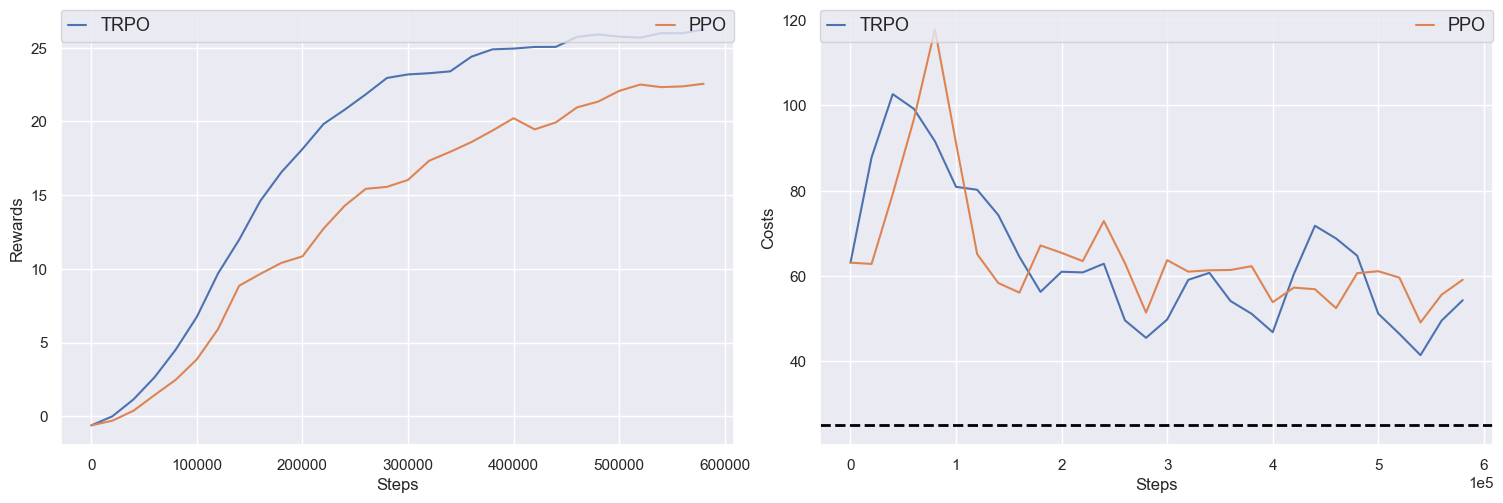

In [5]:
# just fill in the name of the parameter of which value you want to compare.
# then you can specify the value of the parameter you want to compare,
# or you can just specify how many values you want to compare in single graph at most,
# and the function will automatically generate all possible combinations of the graph.
# but the two mode can not be used at the same time.
eg.analyze(parameter='algo', values=None, compare_num=2, cost_limit=25)


In [7]:
eg.evaluate(num_episodes=10)

In [ ]:
eg.render(num_episodes=1, render_mode='rgb_array', width=256, height=256)